# Data Understanding

In this notebook, we will perform initial data understanding and visualizations to understand the dataset better.  

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

**I. Data Dictionary**

| Variable name | Role | Type | Group | List (Range) of values | Demographic | Description |
|----------------|------|------|-------|------------------------|-------------|--------------|
| **name** | Identifier | Categorical | - | Hanoi | Geographic | Identifies the weather station or location where data was recorded. |
| **datetime** | Feature | Datetime | - | 2015-01-01 → 2025-10-01 | Time | Represents the date of daily recorded weather data. Used for time-series analysis. |
| **tempmax** | Feature | Numeric (float) | Temperature | 8.0 → 41.9 °C | Climate | Maximum air temperature of the day, indicating peak daytime heat. |
| **tempmin** | Feature | Numeric (float) | Temperature | 5.9 → 31.0 °C | Climate | Minimum air temperature of the day, representing nighttime cooling. |
| **temp** | **Target** | Numeric (float) | Temperature | 7.0 → 35.5 °C | Climate | Average daily air temperature — used as the model target variable. |
| **feelslikemax** | Feature | Numeric (float) | Temperature | 8.0 → 52.5 °C | Climate | Maximum perceived (“feels like”) temperature, adjusted for humidity/wind. |
| **feelslikemin** | Feature | Numeric (float) | Temperature | 2.1 → 40.4 °C | Climate | Minimum “feels like” temperature, showing cold perception during low humidity. |
| **feelslike** | Feature | Numeric (float) | Temperature | 4.6 → 46.2 °C | Climate | Average perceived daily temperature — better reflects human comfort. |
| **dew** | Feature | Numeric (float) | Humidity | −2.0 → 28.5 °C | Atmospheric | Dew point temperature — the level at which water vapor condenses. |
| **humidity** | Feature | Numeric (float) | Humidity | 31 → 100 % | Atmospheric | Average relative humidity — measures moisture content of air. |
| **precip** | Feature | Numeric (float) | Precipitation | 0.0 → 333.117 mm | Atmospheric | Daily precipitation total — includes rainfall and melted snow equivalent. |
| **precipprob** | Feature | Numeric (int) | Precipitation | 0 → 100 % | Atmospheric | Probability of precipitation (chance of rain/snow). |
| **precipcover** | Feature | Numeric (float) | Precipitation | 0 → 100 % | Atmospheric | Percent of the day with measurable precipitation (duration). |
| **preciptype** | Feature | Categorical | Precipitation | rain | Atmospheric | Type of precipitation recorded (rain, snow, etc.). Only “rain” present in dataset. |
| **snow** | Feature | Numeric (int) | Precipitation | 0 → 0 | Atmospheric | Snowfall amount in millimeters — Hanoi has none in dataset. |
| **snowdepth** | Feature | Numeric (int) | Precipitation | 0 → 0 | Atmospheric | Depth of accumulated snow (0 for all days in Hanoi). |
| **windgust** | Feature | Numeric (float) | Wind | 7.2 → 118.8 km/h | Atmospheric | Maximum wind gust recorded during the day. |
| **windspeed** | Feature | Numeric (float) | Wind | 6.5 → 53.6 km/h | Atmospheric | Average sustained wind speed of the day. |
| **winddir** | Feature | Numeric (float) | Wind | 0 → 359.8° | Atmospheric | Average wind direction in degrees (0° = North, 90° = East, etc.). |
| **sealevelpressure** | Feature | Numeric (float) | Pressure | 991.1 → 1037.2 hPa | Atmospheric | Mean sea-level pressure — indicates atmospheric pressure strength. |
| **cloudcover** | Feature | Numeric (float) | Solar, Cloud and Sky | 0 → 100 % | Atmospheric | Percentage of sky covered by clouds during the day. |
| **visibility** | Feature | Numeric (float) | Solar, Cloud and Sky | 2.4 → 12.6 km | Atmospheric | Average horizontal visibility distance — affected by fog or rain. |
| **solarradiation** | Feature | Numeric (float) | Solar, Cloud and Sky | 0 → 323.5 W/m² | Atmospheric | Average solar radiation reaching the surface. |
| **solarenergy** | Feature | Numeric (float) | Solar, Cloud and Sky | 0 → 27.9 MJ/m² | Atmospheric | Total daily solar energy received — integration of solar radiation over the day. |
| **uvindex** | Feature | Numeric (int) | Solar, Cloud and Sky | 0 → 10 | Atmospheric | Maximum ultraviolet index — measures sun’s UV intensity risk to skin. |
| **severerisk** | Feature | Numeric (float) | Weather Risk | 5 → 100 | Atmospheric | Computed storm/severe weather risk score (missing for many rows). |
| **sunrise** | Feature | Datetime (string) | Time | ~06:33 → ~06:50 | Time | Local sunrise time in ISO format (HH:MM:SS). |
| **sunset** | Feature | Datetime (string) | Time | ~17:26 → ~18:46 | Time | Local sunset time in ISO format (HH:MM:SS). |
| **moonphase** | Feature | Numeric (float) | Lunar | 0 → 0.98 | Time | Lunar phase fraction (0 = new moon, 0.5 = full moon). |
| **conditions** | Feature | Categorical | Summary | Clear, Overcast, Rain, Partially Cloudy | Atmospheric | General weather condition summary for the day. |
| **description** | Feature | Text | Summary | e.g. “Partly cloudy throughout the day.” | Atmospheric | Detailed human-readable weather description. |
| **icon** | Feature | Categorical | Visual | clear-day, partly-cloudy-day, rain, cloudy | Atmospheric | Icon keyword summarizing weather visually for apps/UI. |
| **stations** | Feature | Categorical | Source | station IDs (e.g. 48820099999, VVNB, remote) | Data Source | Lists contributing weather stations for that day’s observation. |

## DATA HANOI DAILY

**I. Basic EDA**

In [69]:
# Load the dataset
df_daily = pd.read_excel(r"../data/raw/hanoi_daily.xlsx")

print("Shape of data:", df_daily.shape)
df_daily.head()

Shape of data: (3927, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,2015-01-01,24.0,11.4,17.7,24.0,11.4,17.7,9.4,63.8,0.0,0,0.0,NaN,0,0,25.2,13.0,78.3,1023.4,0.4,7.2,197.4,17.1,7,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,0.36,Clear,Clear conditions throughout the day.,clear-day,"48820099999,48823099999,48825099999,4883109999..."
1,Hanoi,2015-01-02,22.0,11.0,16.3,22.0,11.0,16.3,9.4,65.6,0.0,0,0.0,NaN,0,0,23.4,13.9,99.8,1022.7,28.3,7.7,187.6,16.2,7,NaN,2015-01-02T06:33:53,2015-01-02T17:26:56,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2,Hanoi,2015-01-03,21.0,13.1,17.0,21.0,13.1,17.0,12.4,75.6,0.0,0,0.0,NaN,0,0,21.6,13.0,97.0,1020.0,42.0,6.0,115.5,9.9,4,NaN,2015-01-03T06:34:11,2015-01-03T17:27:34,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
3,Hanoi,2015-01-04,22.6,16.9,19.3,22.6,16.9,19.3,16.1,82.0,0.6,100,25.0,rain,0,0,25.2,17.2,98.7,1013.5,88.0,6.3,64.3,5.6,3,NaN,2015-01-04T06:34:28,2015-01-04T17:28:12,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,Hanoi,2015-01-05,23.0,18.5,20.4,23.0,18.5,20.4,18.4,88.4,0.0,0,0.0,NaN,0,0,19.1,13.0,85.7,1011.2,90.6,4.2,93.7,7.9,4,NaN,2015-01-05T06:34:44,2015-01-05T17:28:51,0.50,Overcast,Cloudy skies throughout the day.,cloudy,"48820099999,48823099999,48825099999,4883109999..."


In [70]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3927 non-null   object 
 1   datetime          3927 non-null   object 
 2   tempmax           3927 non-null   float64
 3   tempmin           3927 non-null   float64
 4   temp              3927 non-null   float64
 5   feelslikemax      3927 non-null   float64
 6   feelslikemin      3927 non-null   float64
 7   feelslike         3927 non-null   float64
 8   dew               3927 non-null   float64
 9   humidity          3927 non-null   float64
 10  precip            3927 non-null   float64
 11  precipprob        3927 non-null   int64  
 12  precipcover       3927 non-null   float64
 13  preciptype        2885 non-null   object 
 14  snow              3927 non-null   int64  
 15  snowdepth         3927 non-null   int64  
 16  windgust          3927 non-null   float64


In [71]:
# Check categorical-like columns
for col in df_daily.select_dtypes(include='object').columns:
    print(f"{col}: {df_daily[col].nunique()} unique values")

name: 1 unique values
datetime: 3927 unique values
preciptype: 1 unique values
sunrise: 3927 unique values
sunset: 3927 unique values
conditions: 6 unique values
description: 36 unique values
icon: 4 unique values
stations: 32 unique values


The check shows that most string columns either have very few or a very large number of unique values:
- **`name`** and **`preciptype`** each contain only **1 unique value** → constant columns, providing no analytical variance, so we should drop them. 
- **`conditions` (6 values)** and **`icon` (4 values)** clearly represent **categorical variables** describing weather states.  
- **`description` (36 values)** and **`stations` (32 values)** have a **moderate number of unique values** - they can still be treated as categorical if used for grouping or filtering, though `description` is closer to free-text.  
- **`datetime`, `sunrise`, and `sunset`** have **3927 unique values each**, meaning they are **unique per observation** and should remain as `datetime`, not categorical.

Overall, only `conditions` and `icon` are clearly categorical; `description` and `stations` may be semi-categorical, while the rest are identifiers or time-based columns.

**II. Diagnosing and correcting data types**

In [72]:
# Diagnosing and correcting data types
# 1.Datetime column
datetime_cols = ['datetime', 'sunrise', 'sunset']
for col in datetime_cols:
    df_daily[col] = pd.to_datetime(df_daily[col], errors='coerce')
    
# 2 precipprob → float64
df_daily['precipprob'] = df_daily['precipprob'].astype('float64')

# 3. Change to Categorical features
categorical_cols = ['conditions', 'description', 'icon', 'uvindex']
df_daily[categorical_cols] = df_daily[categorical_cols].astype('category')

# 4. Drop 4 columns do not have the values for modeling
df_daily.drop(columns=['name', 'preciptype','snow', 'snowdepth'], inplace=True)

print(df_daily.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          3927 non-null   datetime64[ns]
 1   tempmax           3927 non-null   float64       
 2   tempmin           3927 non-null   float64       
 3   temp              3927 non-null   float64       
 4   feelslikemax      3927 non-null   float64       
 5   feelslikemin      3927 non-null   float64       
 6   feelslike         3927 non-null   float64       
 7   dew               3927 non-null   float64       
 8   humidity          3927 non-null   float64       
 9   precip            3927 non-null   float64       
 10  precipprob        3927 non-null   float64       
 11  precipcover       3927 non-null   float64       
 12  windgust          3927 non-null   float64       
 13  windspeed         3927 non-null   float64       
 14  winddir           3927 n

At this step, we reviewed each column to make sure the data types truly match the meaning of the variables.
- Transform some datetime columns into datetime64 data type.
- **`precipprob`** was changed from `int64` to `float64`, since this column represents the **probability of precipitation (%)**, which in theory can have decimal values. Keeping it as a float makes the data more accurate for later analysis.

- We also converted a few text-based columns —  
  **`conditions`, `description`, `icon`, and `uvindex`** — into the `category` type.  
  These are not continuous values but rather **qualitative labels** (e.g., weather condition, UV level). Converting them helps Pandas handle the data more efficiently and keeps the dataset semantically correct.

- Drop two cloumns contain only one unique value: **`name`**, **`preciptype`**.

- The columns **`snow`** and **`snowdepth`** were removed entirely.  
  They contain only zeros throughout all records, which makes sense for Hanoi’s tropical monsoon climate - it never snows here. Keeping them would only add noise and waste memory.

After these adjustments, the DataFrame (`df_daily`) now feels much “cleaner”: every column has a type that fits its real-world meaning, and the dataset is lighter and ready for further analysis.

In [73]:
df_daily.drop(columns=['precipprob'], inplace=True)

In [74]:
df_daily.describe()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,severerisk,sunrise,sunset,moonphase
count,3927,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,1361.000000,3927,3927,3927.000000
mean,2020-05-17 00:00:00,28.515152,21.934963,24.898370,32.620550,22.703107,27.397021,20.488541,78.27344,5.226019,8.221225,27.022587,17.394423,126.961268,1011.085358,63.828928,8.605602,155.118386,13.388719,28.518736,2020-05-17 05:51:52.353450496,2020-05-17 18:01:52.471352064,0.483990
min,2015-01-01 00:00:00,8.000000,5.900000,7.000000,8.000000,2.100000,4.600000,-2.000000,31.00000,0.000000,0.000000,7.200000,6.500000,0.000000,991.100000,0.000000,2.400000,0.000000,0.000000,5.000000,2015-01-01 06:33:34,2015-01-01 17:26:18,0.000000
25%,2017-09-08 12:00:00,24.100000,18.000000,21.000000,24.100000,18.000000,21.000000,16.850000,72.20000,0.000000,0.000000,21.600000,13.900000,61.900000,1005.200000,49.350000,7.700000,91.100000,7.800000,10.000000,2017-09-08 17:42:01.500000,2017-09-09 06:05:57,0.250000
50%,2020-05-17 00:00:00,29.500000,23.000000,26.100000,32.700000,23.000000,27.100000,22.500000,79.80000,0.267000,4.170000,25.900000,16.600000,109.300000,1010.700000,67.300000,9.000000,154.100000,13.300000,10.000000,2020-05-17 05:18:11,2020-05-17 18:28:05,0.500000
75%,2023-01-23 12:00:00,33.000000,26.000000,29.000000,41.300000,26.000000,33.900000,25.200000,85.80000,2.595000,12.500000,31.000000,20.500000,131.900000,1016.500000,82.300000,9.800000,216.600000,18.700000,60.000000,2023-01-23 18:35:47.500000,2023-01-24 05:41:19,0.750000
max,2025-10-01 00:00:00,41.900000,31.000000,35.500000,52.500000,40.400000,46.200000,28.500000,100.00000,333.117000,100.000000,118.800000,53.600000,359.800000,1037.200000,100.000000,12.600000,323.500000,27.900000,100.000000,2025-10-01 05:47:40,2025-10-01 17:44:44,0.980000
std,NaN,5.842098,4.870462,5.139137,9.530943,6.075115,7.734238,5.783574,10.76699,15.895322,10.936552,8.080222,4.999515,97.746225,7.142712,23.636997,1.756703,77.239502,6.676342,24.089535,NaN,NaN,0.288759


Comments about summary statistics:
- The temperature values fit well with Hanoi’s climate, though the “feels like” temperatures peaking above 50°C seem to be outliers or from the reason about humidity.
- Precipitation is another variable that stands out — most days are dry, but a few entries show rainfall over 300 mm, which is unusually high for Hanoi, which can refer to large hurricane.
- Some probability-related columns, like `precipprob` and `precipcover`, also seem to lean toward round figures such as 100%, suggesting they might work better as categorical indicators rather than continuous percentages => drop 'precipprob'.
- Apart from that, the dataset structure is generally solid. The variable `severerisk` has too many missing values to be reliable, and columns like `name` or `preciptype` that contain only one value could be safely removed. With a bit of cleaning for these edge cases, the data should be ready for modeling => Handling missing data phase will focus on this.

In [75]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          3927 non-null   datetime64[ns]
 1   tempmax           3927 non-null   float64       
 2   tempmin           3927 non-null   float64       
 3   temp              3927 non-null   float64       
 4   feelslikemax      3927 non-null   float64       
 5   feelslikemin      3927 non-null   float64       
 6   feelslike         3927 non-null   float64       
 7   dew               3927 non-null   float64       
 8   humidity          3927 non-null   float64       
 9   precip            3927 non-null   float64       
 10  precipcover       3927 non-null   float64       
 11  windgust          3927 non-null   float64       
 12  windspeed         3927 non-null   float64       
 13  winddir           3927 non-null   float64       
 14  sealevelpressure  3927 n

In [76]:
# Save processed data
df_daily.to_excel('../data/processed/data_daily_after_basic_understand.xlsx', index=False)

**III. Deeper EDA**

In [77]:
data = df_daily.copy()

**A. NUMERICAL FEATURES**

**1. Target variable (Temp)**


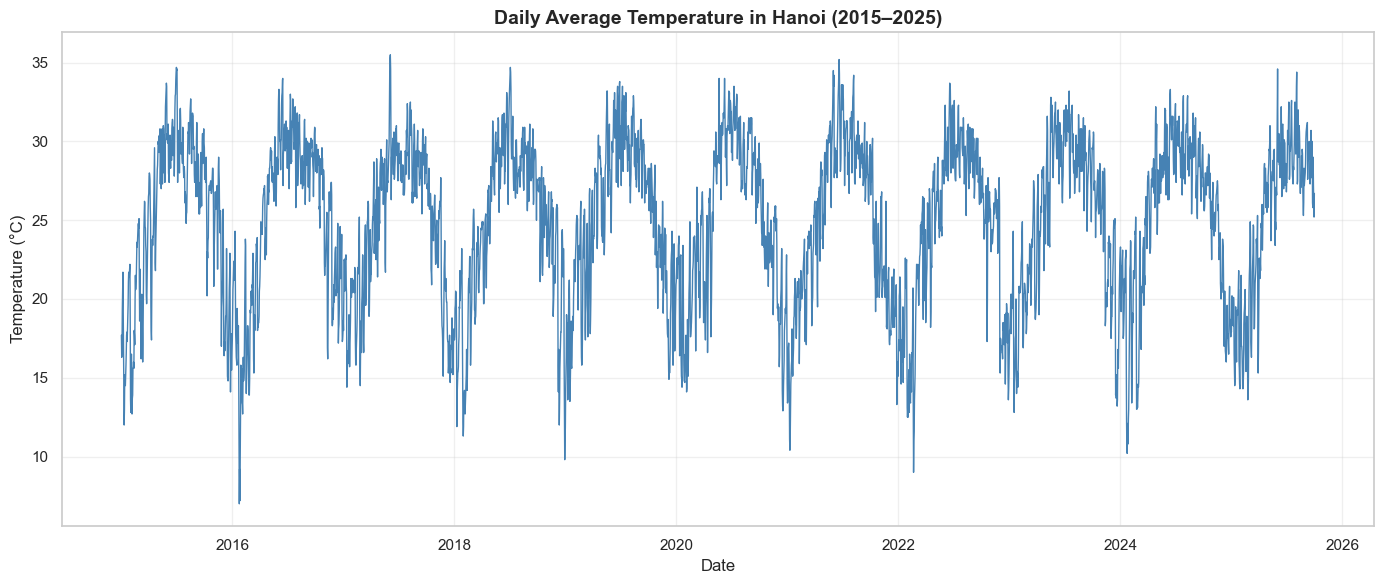

In [78]:
# Vẽ biểu đồ đường cho cột temp (target variable)
plt.figure(figsize=(14, 6))
plt.plot(data['datetime'], data['temp'], color='steelblue', linewidth=1)

# Tuỳ chỉnh hiển thị
plt.title("Daily Average Temperature in Hanoi (2015–2025)", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Không hiển thị legend
plt.show()

- The temperature chart of Hanoi from 2015 to 2025 displays a strongly seasonal and rhythmic pattern, characteristic of a tropical monsoon climate. Each year follows a consistent cycle of warming from early spring, peaking during the hot summer months, and gradually cooling toward the year’s end, revealing a stable annual periodicity.
- The amplitude of fluctuation remains largely consistent, with temperatures ranging between 10°C in winter and 35°C in summer, suggesting an annual variation of about 25°C. This stability indicates that Hanoi’s overall thermal structure has been steady over the past decade, showing no clear evidence of long-term warming or cooling trends.
- Some years exhibit greater climatic extremes than others. Noticeable cold spells occur in 2016, 2021, 2022, and 2024, while 2017 and 2021 mark exceptionally hot summers exceeding 35°C. In contrast, 2018–2019 and 2023 appear relatively mild, with smoother transitions between seasons. Such interannual variability may be associated with fluctuations in monsoon intensity or regional climatic anomalies.
- Overall, the graph illustrates a predictable yet dynamic climate rhythm. Despite occasional extremes, the temperature pattern remains stable and cyclical, reflecting the resilience of Hanoi’s monsoon-driven climate and its well-balanced alternation between heat and coolness across the four seasons.

**2. Temperature group**

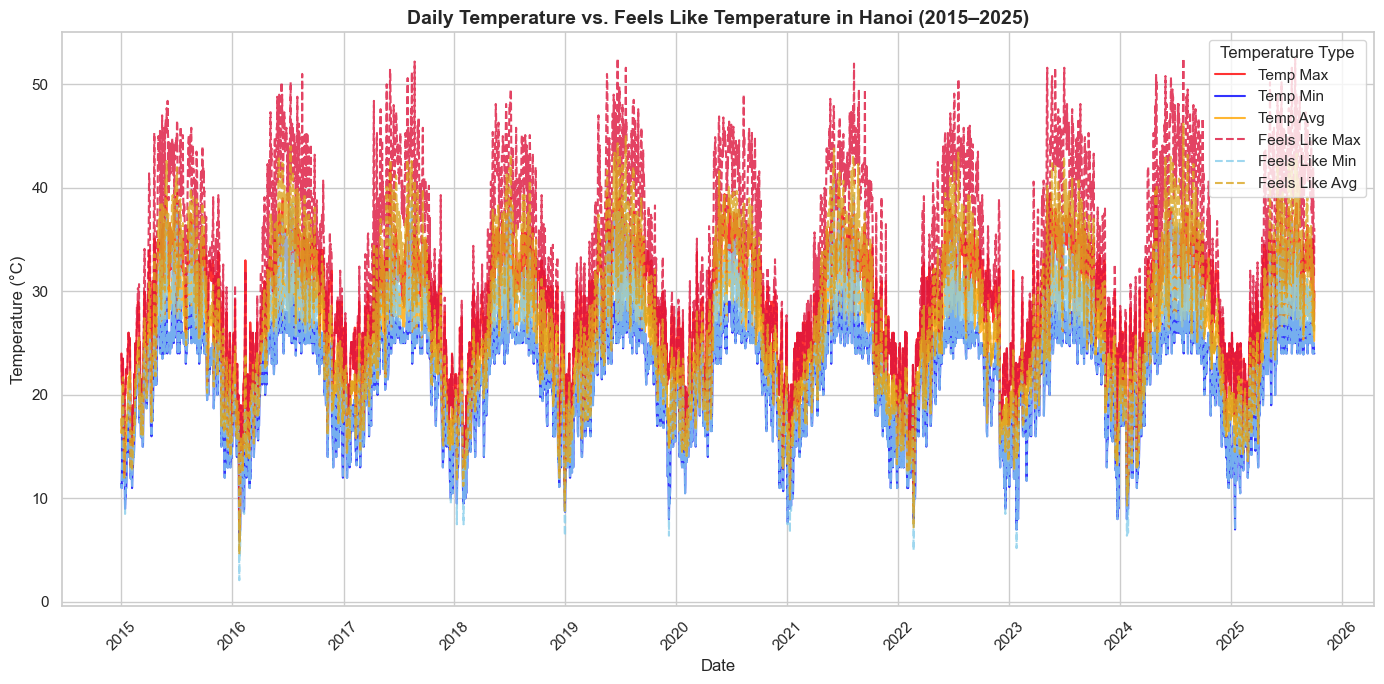

In [79]:
plt.figure(figsize=(14, 7))

sns.lineplot(x='datetime', y='tempmax', data=data, label='Temp Max', color='red', alpha=0.8)
sns.lineplot(x='datetime', y='tempmin', data=data, label='Temp Min', color='blue', alpha=0.8)
sns.lineplot(x='datetime', y='temp', data=data, label='Temp Avg', color='orange', alpha=0.8)

sns.lineplot(x='datetime', y='feelslikemax', data=data, label='Feels Like Max', linestyle='--', color='crimson', alpha=0.8)
sns.lineplot(x='datetime', y='feelslikemin', data=data, label='Feels Like Min', linestyle='--', color='skyblue', alpha=0.8)
sns.lineplot(x='datetime', y='feelslike', data=data, label='Feels Like Avg', linestyle='--', color='goldenrod', alpha=0.8)

plt.title('Daily Temperature vs. Feels Like Temperature in Hanoi (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())      
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 7)))

plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(title='Temperature Type', loc='upper right')
plt.show()


- Temperatures in Hanoi have a clear seasonal cycle, with peaks in summer (May–August) and troughs in winter (December–February).

- The “Feels Like” curve is roughly parallel and coincides with the actual temperature curve, showing a small difference, but is still slightly higher in summer — possibly due to high humidity and the hotter effect.

- The amplitude of fluctuations (the difference between tempmax and tempmin) is larger in the transition months (March–April and September–October), indicating erratic weather.

- Overall, the correlation between actual and felt temperatures is strongly linear, suggesting that the feelslike and temp variables can be combined in the feature engineering step or one of the two can be chosen to represent this group.

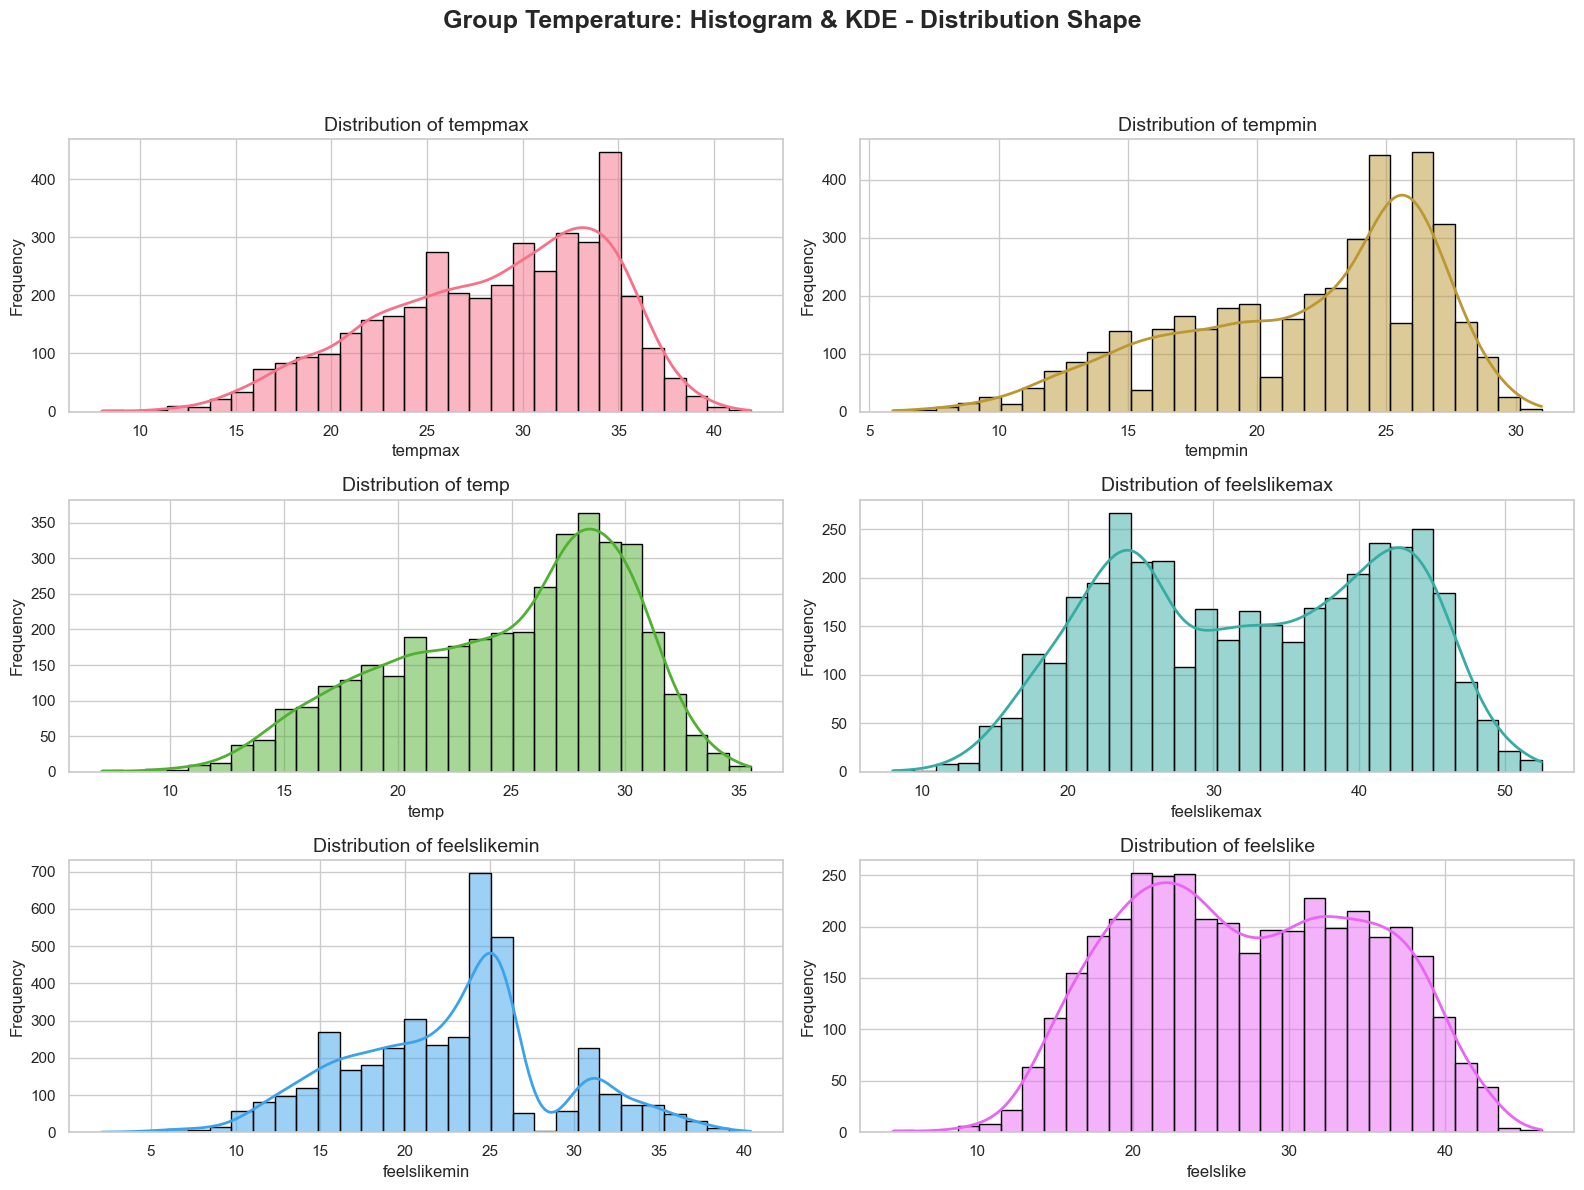

In [102]:
group_name = 'Temperature'
features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike']

n_features = len(features)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

# Định nghĩa bảng màu độc lập (husl) với số lượng màu bằng số lượng biến
colors = sns.color_palette("husl", n_colors=n_features)
# --------------------------------------------------------------------------------------

plt.rcParams['figure.figsize'] = (16, 4 * n_rows)

fig_hist, axes_hist = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
fig_hist.suptitle(f'Group {group_name}: Histogram & KDE - Distribution Shape', 
                  fontsize=18, fontweight='bold', y=1.02)
axes_hist = axes_hist.flatten() 

for i, col in enumerate(features):
    if col in data.columns:
        # Sử dụng colors[i] để gán màu riêng biệt cho mỗi biểu đồ
        sns.histplot(data=data, x=col, kde=True, ax=axes_hist[i], 
                     color=colors[i], # Gán màu từ palette
                     edgecolor='black', 
                     bins=30, 
                     line_kws={'lw': 2, 'color': 'black'}) # Đường KDE màu đen để dễ tương phản
        axes_hist[i].set_title(f'Distribution of {col}', fontsize=14)
        axes_hist[i].set_ylabel('Frequency', fontsize=12)

# Ẩn các ô trống còn lại
for j in range(i + 1, n_rows * n_cols):
    if j < len(axes_hist):
        fig_hist.delaxes(axes_hist[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

- Distribution of Actual Temperatures ($tempmax$, $tempmin$, $temp$)

The distributions of the actual temperature variables reveal distinct shapes depending on the measurement. The $temp$ (Average Temperature) variable exhibits the most symmetrical distribution, closely resembling a normal (unimodal) distribution, with a strong concentration between $25^\circ C$ and $30^\circ C$. This suggests that this range represents the most frequently recorded average temperature. In contrast, $tempmax$ (Maximum Temperature) is slightly skewed left (negatively skewed), with the bulk of observations clustered in the warmer range, particularly between $32^\circ C$ and $35^\circ C$. Conversely, $tempmin$ (Minimum Temperature) shows a pronounced right skew (positively skewed), with its peak frequency occurring between $22^\circ C$ and $26^\circ C$. This indicates that lower minimum temperatures are recorded more often than extremely high minimum temperatures.

- Distribution of Perceived Temperatures ($feelslikemax$, $feelslikemin$, $feelslike$)

The variables representing the perceived "feels like" temperature exhibit more complex, often multi-modal distribution shapes, suggesting that human sensation is influenced by factors beyond mere air temperature, such as humidity. The $feelslikemax$ (Maximum Feels Like Temperature) is distinctly bimodal, featuring one peak around $20^\circ C - 25^\circ C$ and a more prominent second peak around $40^\circ C - 45^\circ C$. This separation likely reflects two dominant weather modes: pleasant/mild days and very hot/stifling days. Similarly, $feelslike$ (Average Feels Like Temperature) also appears bimodal, with high frequencies clustering around $20^\circ C - 25^\circ C$ and another group around $28^\circ C - 32^\circ C$. Finally, while strongly right-skewed, $feelslikemin$ (Minimum Feels Like Temperature) shows a major peak at $18^\circ C - 22^\circ C$ and a notable secondary peak near $30^\circ C$. This unusual secondary peak suggests that high humidity can cause even the minimum daily temperature to be perceived as significantly warmer than the actual measurement.

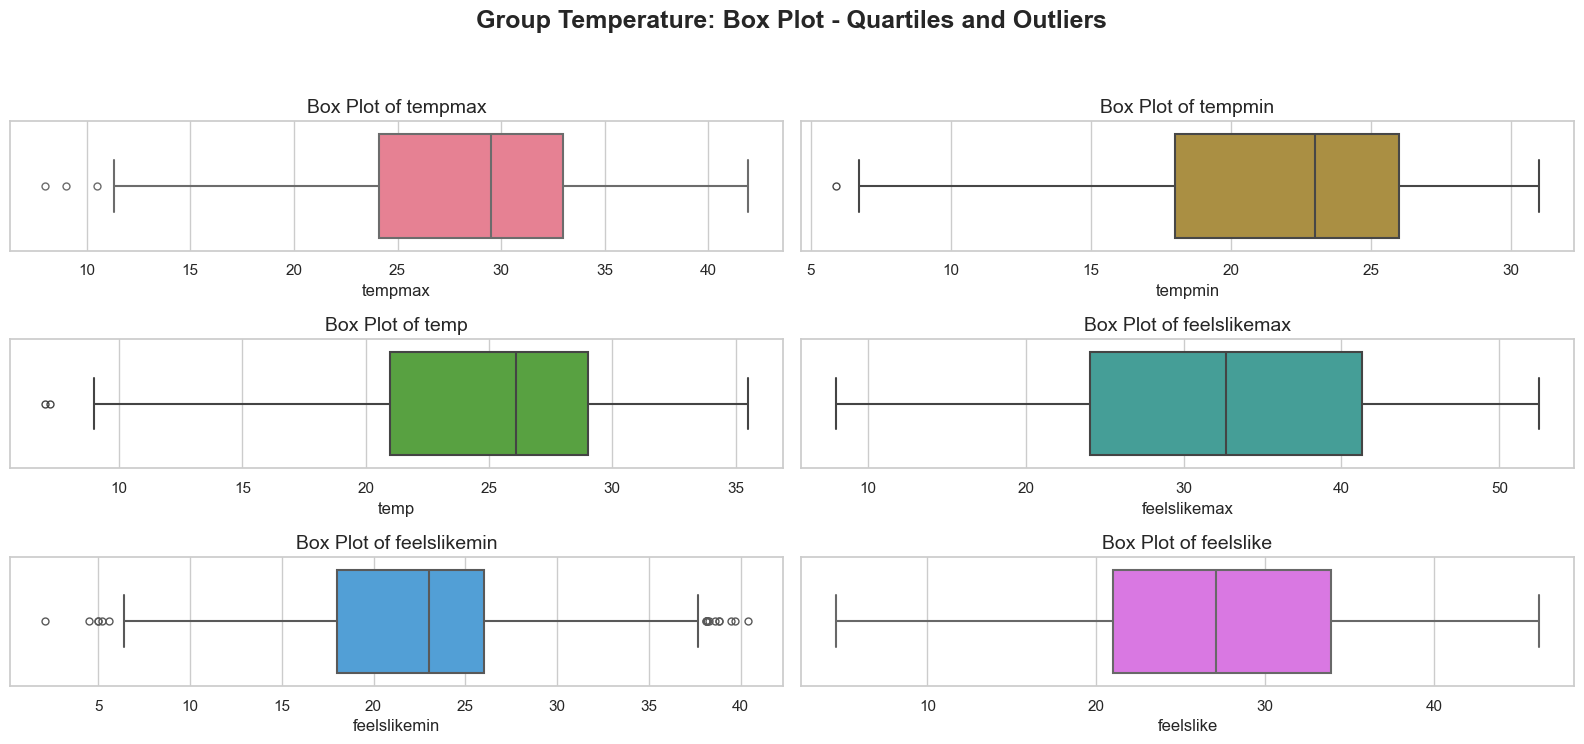

In [ ]:
colors = sns.color_palette("husl", n_colors=n_cols)

fig_box, axes_box = plt.subplots(n_rows, n_cols, figsize=(16, 2.5 * n_rows))
fig_box.suptitle(f'Group {group_name}: Box Plot - Quartiles and Outliers', 
                 fontsize=18, fontweight='bold', y=1.02)
axes_box = axes_box.flatten() 

for i, col in enumerate(features):
    if col in data.columns:
        # Sử dụng colors[i] để gán màu riêng biệt cho mỗi biểu đồ
        sns.boxplot(data=data, x=col, ax=axes_box[i], 
                    color=colors[i], # Gán màu từ palette
                    orient='h', fliersize=5, linewidth=1.5)
        axes_box[i].set_title(f'Box Plot of {col}', fontsize=14)
        axes_box[i].set_ylabel('')

# Ẩn các ô trống còn lại
for j in range(i + 1, n_rows * n_cols):
    if j < len(axes_box):
        fig_box.delaxes(axes_box[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

The box plot analysis reveals significant differences in dispersion, symmetry, and the presence of outliers among the six temperature variables.

In the actual temperature group, the $temp$ (Average Temperature) variable is the most symmetric, with the median situated near the center of the interquartile range (IQR), spanning roughly $23^\circ C$ to $29^\circ C$, though it exhibits some clear outliers at very low temperatures. $tempmin$ (Minimum Temperature) has its median slightly skewed toward the lower values, suggesting a mildly positive (right) skew, concentrated primarily between $18^\circ C$ and $26^\circ C$. Conversely, the median for $tempmax$ (Maximum Temperature) is shifted toward higher values, suggesting a negative (left) skew, with a wide IQR from $25^\circ C$ to $32^\circ C$ and a few outliers at the low end of the maximum temperature scale.

In the feels like temperature group, the $feelslikemax$ (Maximum Feels Like Temperature) variable stands out with the widest IQR (ranging from $25^\circ C$ to $40^\circ C$), indicating the greatest variability in the perception of maximum temperature, although it appears relatively symmetric within the box itself. $feelslike$ (Average Feels Like Temperature) also demonstrates good symmetry, with its median close to the center of the box. The most notable observation concerns $feelslikemin$ (Minimum Feels Like Temperature): despite its IQR being centered between $17^\circ C$ and $25^\circ C$, this variable has the highest number of outliers at both extremes (very low and very high). This emphasizes that the perception of minimum temperature is the most susceptible to extreme factors and exhibits the largest fluctuation in rare, extreme values.

**3. Humidity**

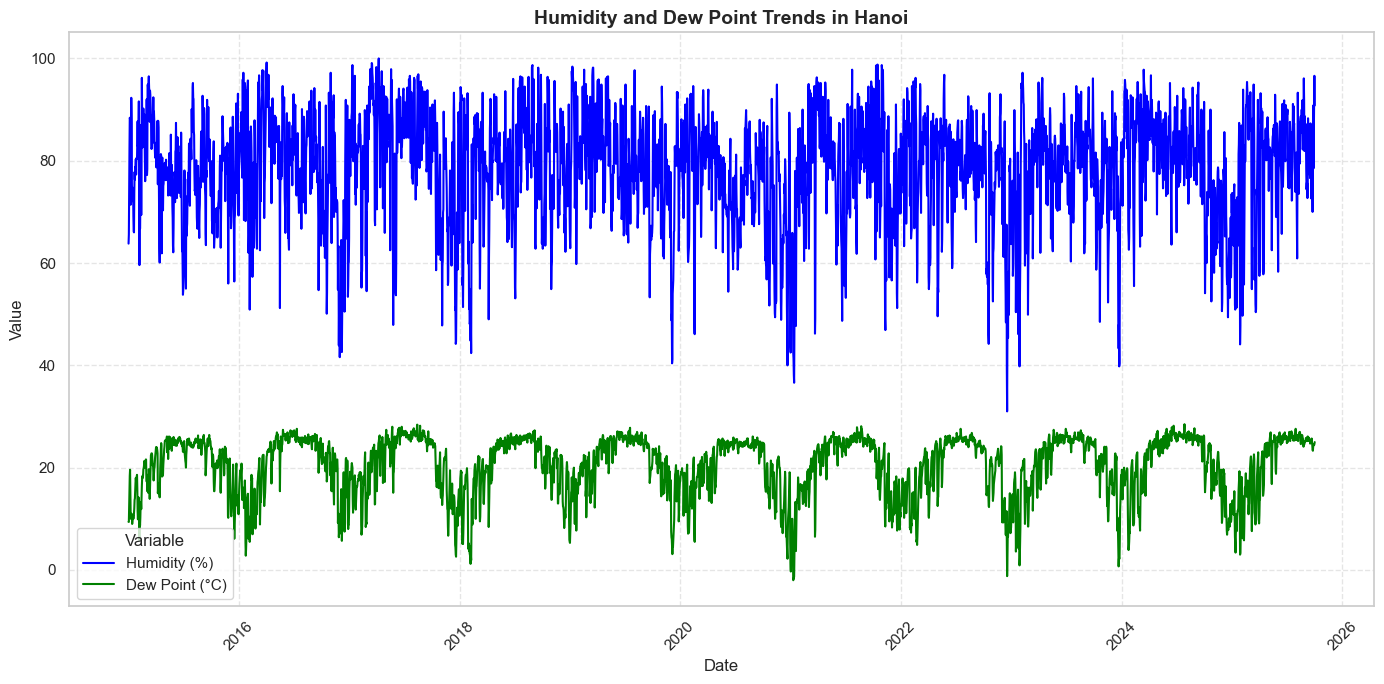

In [82]:
plt.figure(figsize=(14, 7))

sns.lineplot(x='datetime', y='humidity', data=df_daily, label='Humidity (%)', color='blue')
sns.lineplot(x='datetime', y='dew', data=df_daily, label='Dew Point (°C)', color='green')

plt.title('Humidity and Dew Point Trends in Hanoi', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Variable')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Humidity remains high year-round, mostly between 70% and 90%, with occasional drops below 50%. There are frequent short-term spikes and dips, indicating rapid weather changes typical of a humid subtropical climate.

- Dew point follows a strong annual cycle, peaking around 25–27°C during summer and dropping to 5–10°C in winter. This pattern reflects Hanoi’s clear seasonal differences—hot, humid summers and cooler, drier winters.

- The dew point and humidity generally move in the same direction, meaning when one rises, the other tends to increase as well. However, humidity fluctuates more sharply, while dew point changes more smoothly across the seasons.

- Overall, both humidity and dew point show consistent seasonal fluctuations throughout the years. Hanoi maintains a consistently humid climate with clear seasonal dew point variations.

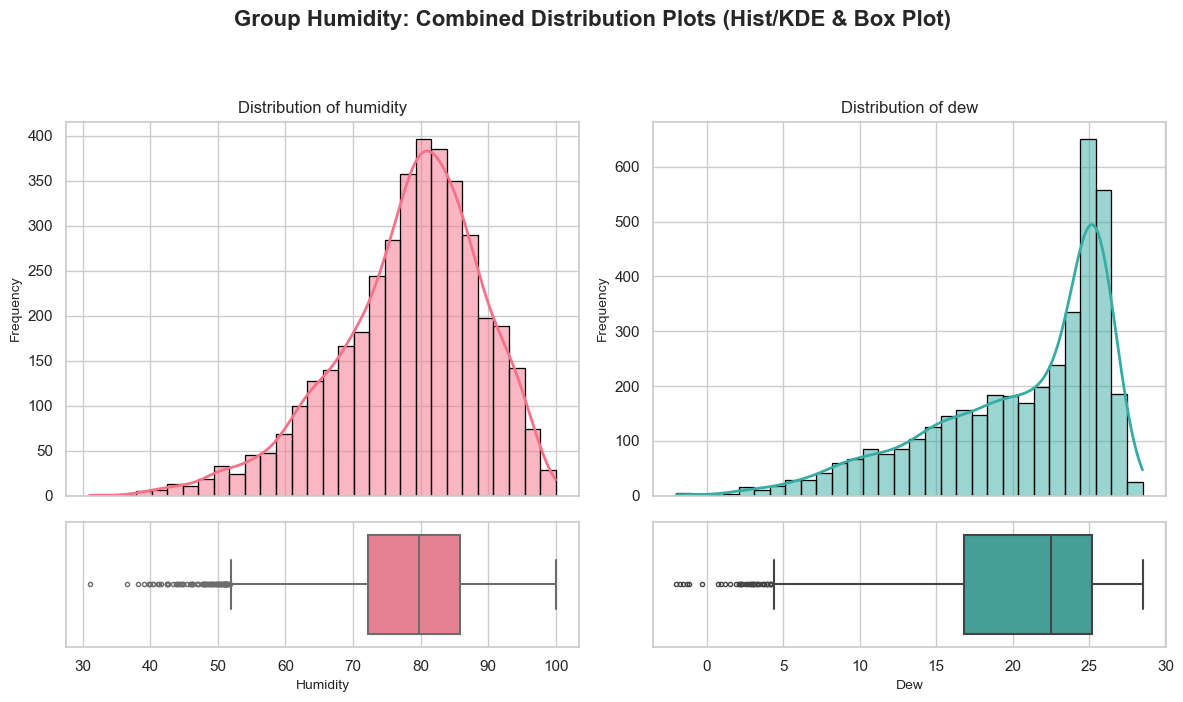

In [115]:
group_name = 'Humidity'
features = ['humidity', 'dew']

n_cols = len(features)
n_rows = 2

colors = sns.color_palette("husl", n_colors=n_cols)

fig, axes = plt.subplots(n_rows, n_cols, 
                         figsize=(6 * n_cols, 7), 
                         sharex='col', # Share X-axis limits across columns (vertical stack)
                         gridspec_kw={'height_ratios': [3, 1]})

fig.suptitle(f'Group {group_name}: Combined Distribution Plots (Hist/KDE & Box Plot)', 
             fontsize=16, fontweight='bold', y=1.03)

for i, col in enumerate(features):
    # Top Row: Histogram/KDE
    # Use distinct color for bar, and a single color (black) for KDE line for contrast
    sns.histplot(data=data, x=col, kde=True, ax=axes[0, i], 
                 color=colors[i], # Distinct color
                 edgecolor='black', bins=30, line_kws={'lw': 2, 'color': 'black'}) 
    axes[0, i].set_title(f'Distribution of {col}', fontsize=12)
    axes[0, i].set_ylabel('Frequency', fontsize=10)
    axes[0, i].set_xlabel('') 

    # Bottom Row: Box Plot
    # Use the same distinct color for consistency with the histogram above
    sns.boxplot(data=data, x=col, ax=axes[1, i], 
                color=colors[i], # Distinct color
                orient='h', fliersize=3, linewidth=1.5)
    axes[1, i].set_xlabel(col.capitalize(), fontsize=10)
    axes[1, i].set_ylabel('')
    axes[1, i].set_yticks([]) 

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

The $Humidity$ distribution is nearly symmetric with a slight negative (left) skew, peaking strongly around $80\%-85\%$. Its Box Plot confirms high concentration within the IQR, with a few outliers observed only at the low end (very dry conditions).

The $Dew$ (Dew Point) distribution, conversely, shows a strong positive (right) skew, with frequencies steadily rising to a high peak around $25^\circ C - 27^\circ C$. This indicates that high dew points (moist air) are the most frequent occurrences. The Box Plot displays a long tail of data and several outliers at the very low end (near $0^\circ C$), representing rare instances of extremely dry air.

In summary: Humidity is concentrated and nearly normal, while Dew Point is heavily skewed towards high values. Both variables show that conditions of very low moisture are outliers.

**4. Precipitation group**

- Since all two variables (`precip`, `precipcover`) are time-dependent and measured daily, **line plots** are the most suitable choice.  
They reveal when heavy rain events occur, how forecast probabilities behave seasonally, and how precipitation coverage changes throughout the year.

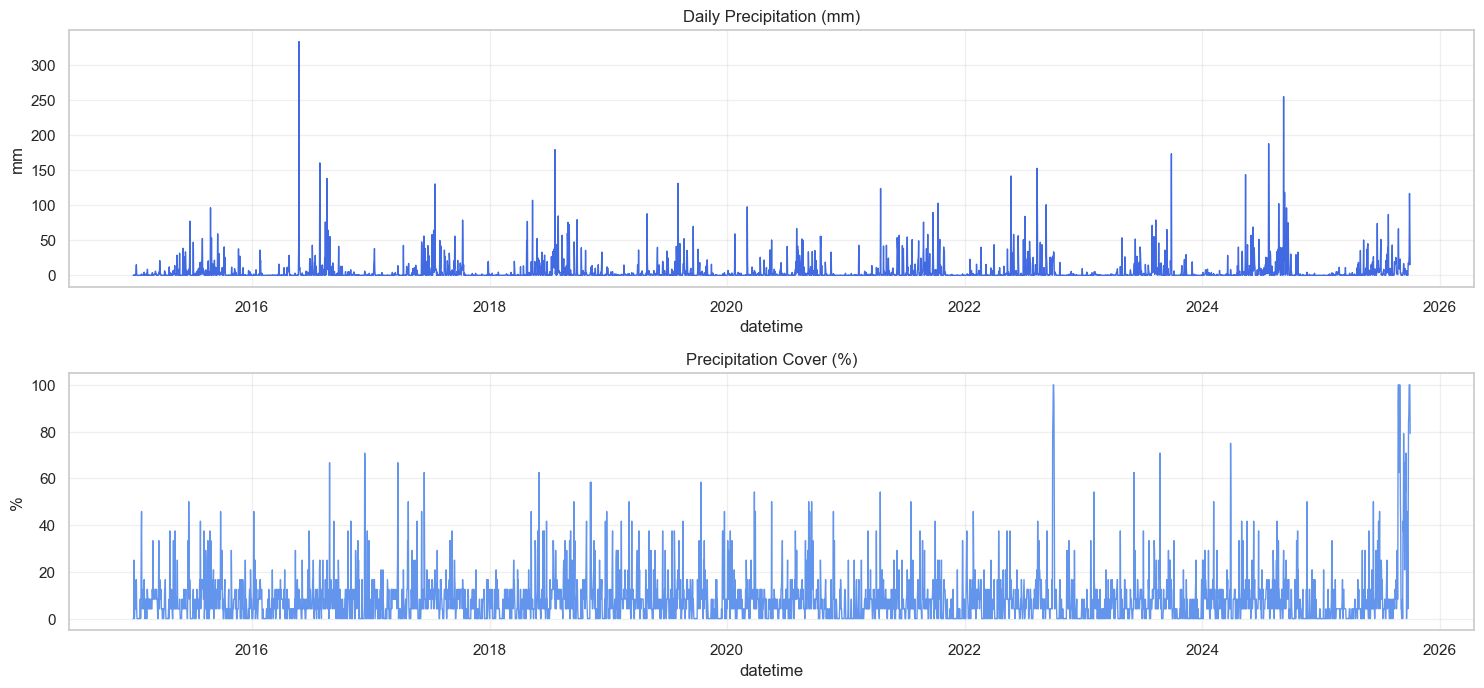

In [84]:
plt.figure(figsize=(15, 10))

# Lượng mưa thực tế
plt.subplot(3, 1, 1)
sns.lineplot(x='datetime', y='precip', data=df_daily, color='royalblue', linewidth=1)
plt.title("Daily Precipitation (mm)", fontsize=12)
plt.ylabel("mm")
plt.grid(alpha=0.3)

# Độ bao phủ mưa
plt.subplot(3, 1, 2)
sns.lineplot(x='datetime', y='precipcover', data=df_daily, color='cornflowerblue', linewidth=1)
plt.title("Precipitation Cover (%)", fontsize=12)
plt.ylabel("%")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

- The two plots show that rainfall in Hanoi is **highly seasonal**, with clear peaks during the summer monsoon (roughly May to September) and long dry stretches during the winter months.  
    + `precip` reveals sharp, irregular spikes — most days are dry, but heavy rain events occasionally exceed 100 mm/day, reflecting short, intense tropical downpours typical of the region.  
    + `precipcover`, in contrast, fluctuates more smoothly and often stays elevated over longer periods, representing days with prolonged rain or scattered showers that cover much of the day.
- From a climatic perspective, precipitation affects temperature in **two opposite ways**.  
- In the short term, rainfall cools the air by blocking sunlight and promoting evaporation — the temperature often drops during or just after a rain event.  
However, in the following hours or days, the **humidity left behind** raises the perceived heat, making the atmosphere feel heavier and less comfortable even when measured temperatures moderate.  
- This explains why Hanoi’s rainy season can still feel oppressively hot despite frequent rainfall.
    + The **precipitation cover** plot supports this dual behavior:  
when the percentage of the day with rain is high, daytime highs tend to stay moderate due to reduced sunlight, but the lingering surface moisture traps heat near the ground at night.  
    + Conversely, when the cover remains low for many consecutive days, the air becomes drier — temperatures rise sharply in the daytime, yet the heat feels less suffocating compared to humid periods with similar readings.


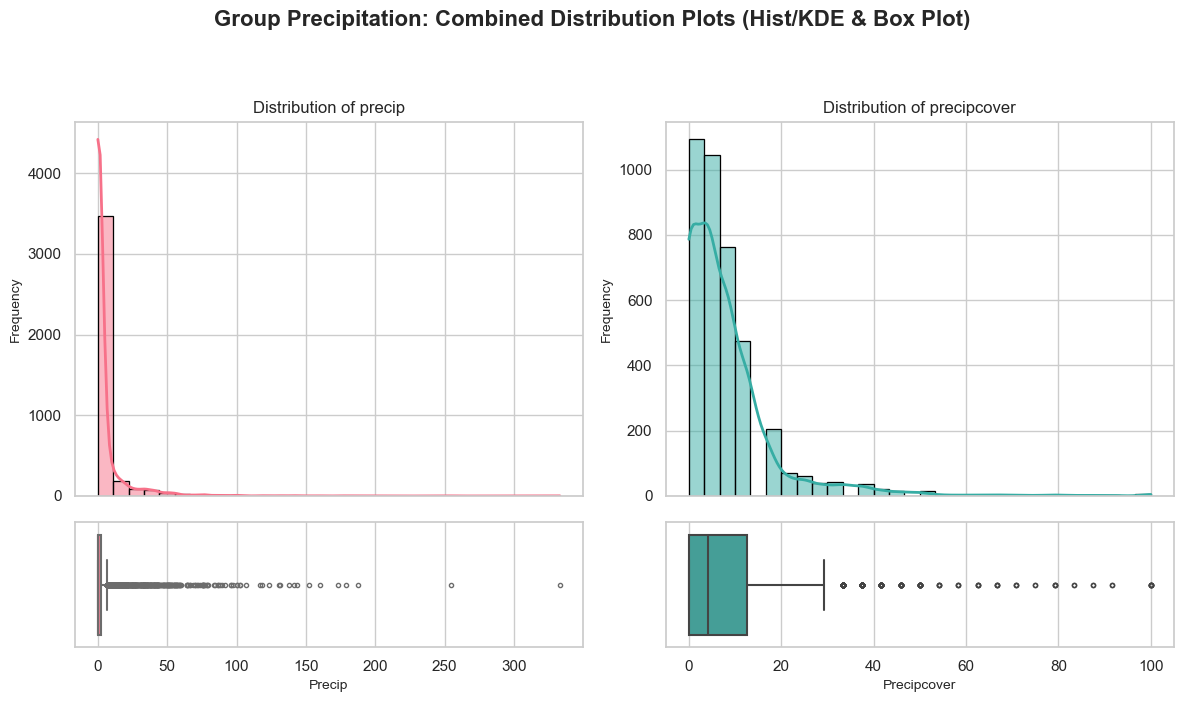

In [114]:
group_name = 'Precipitation'
features = ['precip', 'precipcover']
n_cols = len(features)
n_rows = 2

colors = sns.color_palette("husl", n_colors=n_cols)

fig, axes = plt.subplots(n_rows, n_cols, 
                         figsize=(6 * n_cols, 7), 
                         sharex='col', # Share X-axis limits across columns (vertical stack)
                         gridspec_kw={'height_ratios': [3, 1]}) # Set Hist/KDE to be 3x taller than Box Plot

fig.suptitle(f'Group {group_name}: Combined Distribution Plots (Hist/KDE & Box Plot)', 
             fontsize=16, fontweight='bold', y=1.03)

for i, col in enumerate(features):
    # Top Row (Row 0): Histogram/KDE
    sns.histplot(data=data, x=col, kde=True, ax=axes[0, i], 
                 color=colors[i], # Use distinct color
                 edgecolor='black', bins=30, line_kws={'lw': 2, 'color': 'black'}) # Black KDE for contrast
    axes[0, i].set_title(f'Distribution of {col}', fontsize=12)
    axes[0, i].set_ylabel('Frequency', fontsize=10)
    axes[0, i].set_xlabel('') 

    # Bottom Row (Row 1): Box Plot
    sns.boxplot(data=data, x=col, ax=axes[1, i], 
                color=colors[i], # Use the same distinct color
                orient='h', fliersize=3, linewidth=1.5)
    axes[1, i].set_xlabel(col.capitalize(), fontsize=10)
    axes[1, i].set_ylabel('')
    axes[1, i].set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


Both $precip$ (Precipitation) and $precipcover$ (Precipitation Coverage) exhibit extreme positive skewness, indicating that most recorded days have little to no rainfall.

The $precip$ distribution shows an exceptionally high peak at zero, signifying that days with zero or near-zero rainfall dominate the dataset. Its Box Plot is extremely narrow near zero and features a large number of outliers spanning the entire range, representing rare, heavy rain events.

The $precipcover$ distribution is also highly skewed but slightly less extreme, with its mode concentrated between $0\%$ and $10\%$. Its Box Plot is slightly wider near the baseline, showing a series of outliers at high coverage levels (above $40\%$). Both variables confirm that high-value precipitation events are highly uncommon.

**5. Wind group**

Line plots are chosen here to highlight how wind intensity and direction change over the 10-year period.

- `windgust` shows the strongest instantaneous wind speeds (gusts),  
- `windspeed` represents the average sustained wind velocity,  
- and `winddir` gives the dominant direction of the wind flow in degrees (0° = North, 90° = East, etc.).

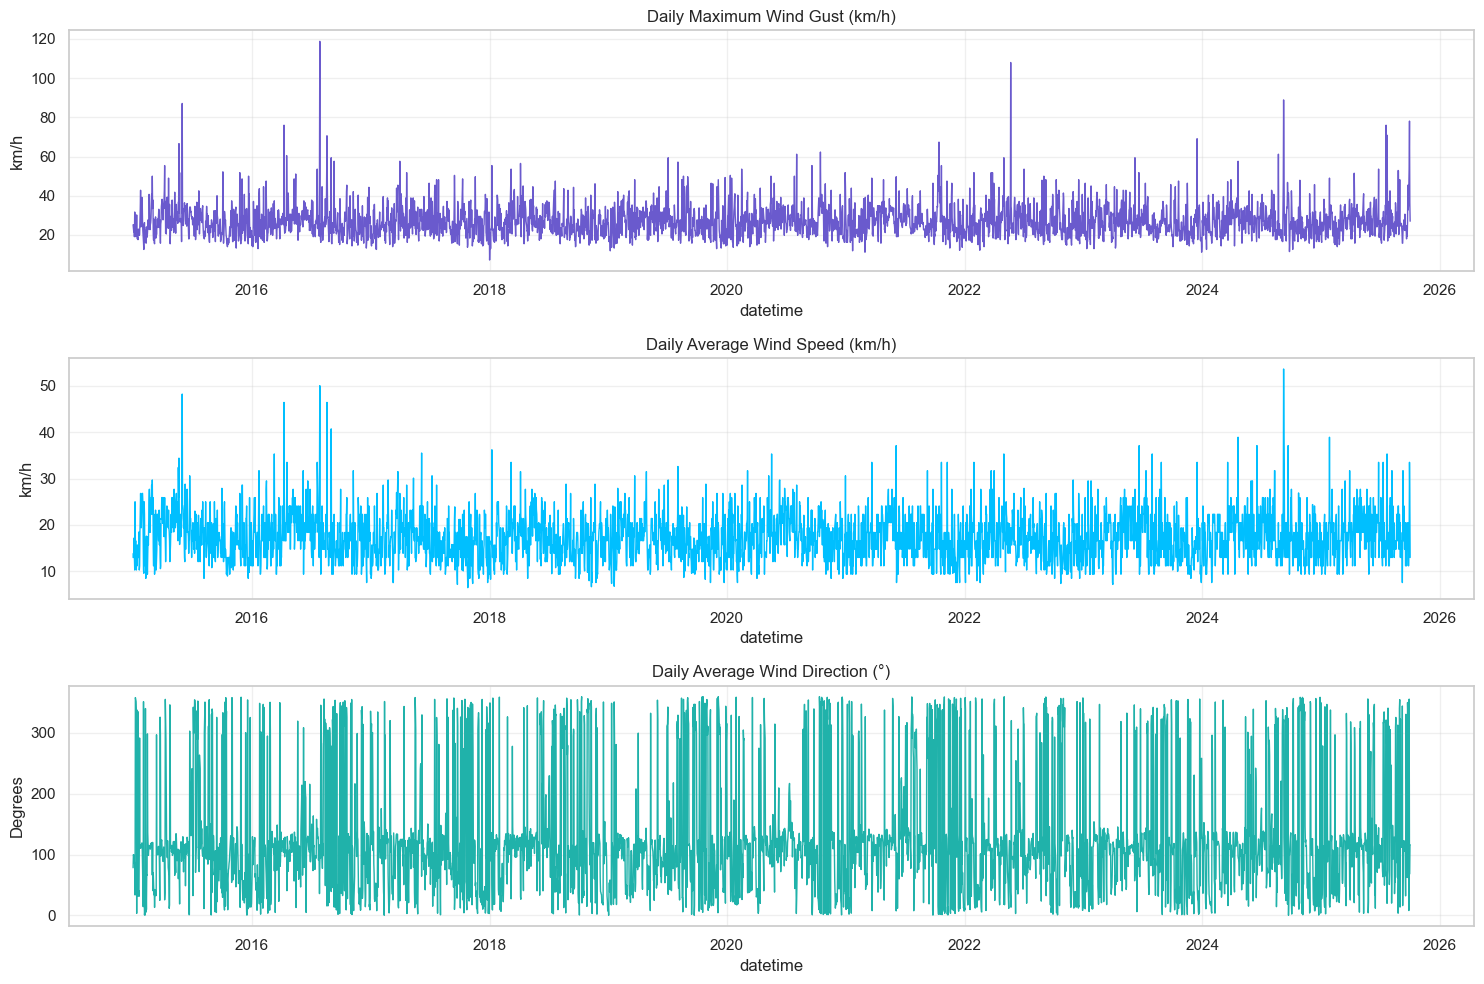

In [86]:
plt.figure(figsize=(15, 10))

# 1️⃣ Wind gusts (tốc độ gió giật cực đại)
plt.subplot(3, 1, 1)
sns.lineplot(x='datetime', y='windgust', data=df_daily, color='slateblue', linewidth=1)
plt.title("Daily Maximum Wind Gust (km/h)", fontsize=12)
plt.ylabel("km/h")
plt.grid(alpha=0.3)

# 2️⃣ Wind speed (tốc độ gió trung bình)
plt.subplot(3, 1, 2)
sns.lineplot(x='datetime', y='windspeed', data=df_daily, color='deepskyblue', linewidth=1)
plt.title("Daily Average Wind Speed (km/h)", fontsize=12)
plt.ylabel("km/h")
plt.grid(alpha=0.3)

# 3️⃣ Wind direction (hướng gió trung bình)
plt.subplot(3, 1, 3)
sns.lineplot(x='datetime', y='winddir', data=df_daily, color='lightseagreen', linewidth=1)
plt.title("Daily Average Wind Direction (°)", fontsize=12)
plt.ylabel("Degrees")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

- Across the decade, both `windgust` and `windspeed` show relatively stable seasonal patterns with occasional sharp peaks —  
those spikes likely correspond to **monsoon transitions or tropical storm events**, when short bursts of strong wind are recorded. The typical sustained wind speed remains moderate, while gusts occasionally exceed 80–100 km/h, especially during late summer or autumn when storms are more frequent. 
- `winddir` fluctuates widely between 0° and 360°, but some clustering around **180°–270°** (southern to western flow) may indicate the **southwest monsoon** influence in summer, while increased readings near **0°–90°** suggest **northeast monsoon** winds dominating during winter months.
- Together, these patterns depict Hanoi’s characteristic **bimodal monsoon system** — calm most of the year, punctuated by strong gusts during seasonal transitions, with the direction of prevailing winds alternating distinctly between northern and southern hemispheric flows.

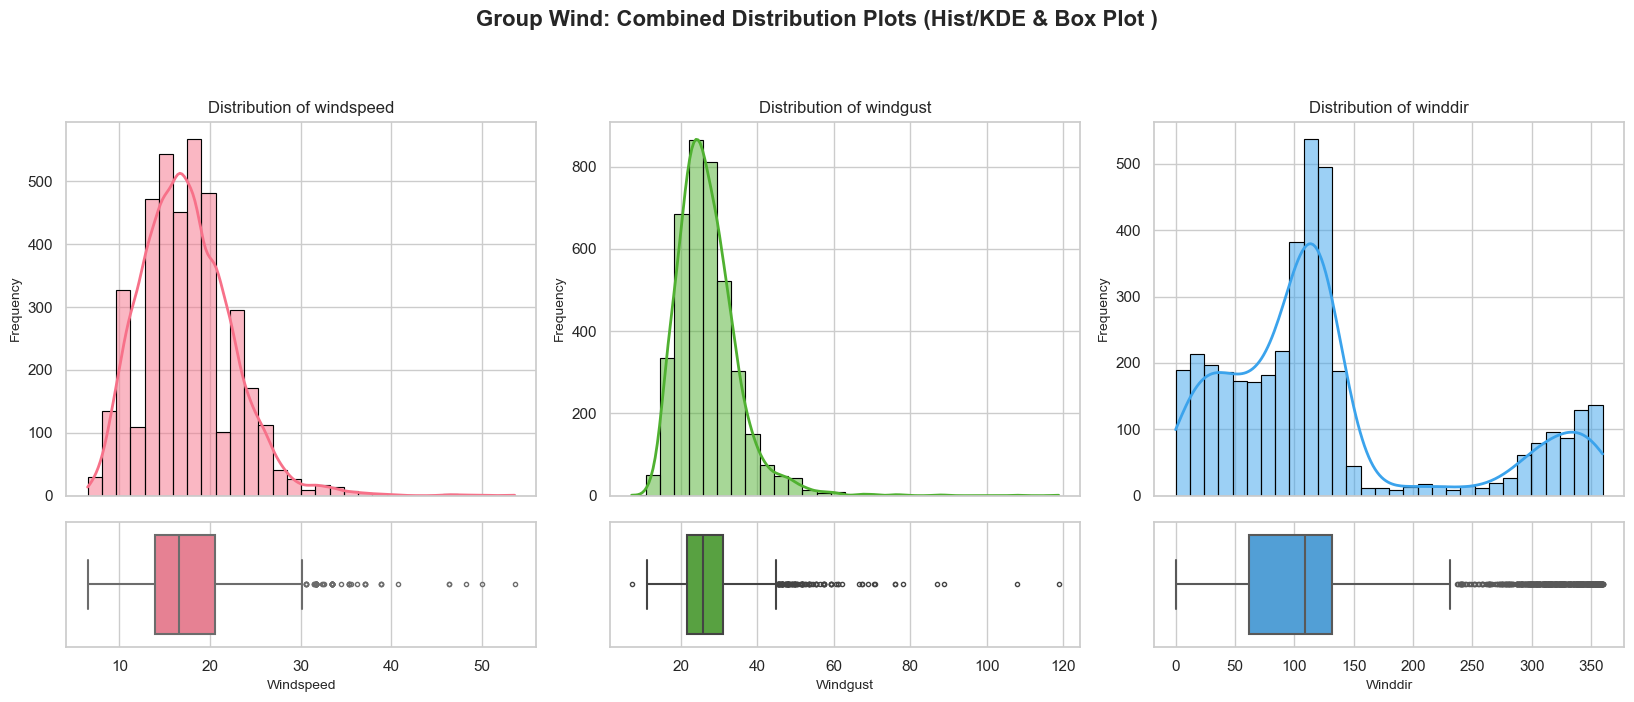

In [113]:

group_name = 'Wind'
features = ['windspeed', 'windgust', 'winddir']
n_cols = len(features)
n_rows = 2

colors = sns.color_palette("husl", n_colors=n_cols)

# Create a figure with 2 rows and n_cols columns
fig, axes = plt.subplots(n_rows, n_cols, 
                         figsize=(5.5 * n_cols, 7), # Adjusted size for 3x2 grid
                         sharex='col', # Share X-axis limits across columns
                         gridspec_kw={'height_ratios': [3, 1]}) # Ratio 3:1 for Hist:Box

fig.suptitle(f'Group {group_name}: Combined Distribution Plots (Hist/KDE & Box Plot )', 
             fontsize=16, fontweight='bold', y=1.03)

for i, col in enumerate(features):
    # Top Row (Row 0): Histogram/KDE
    sns.histplot(data=data, x=col, kde=True, ax=axes[0, i], 
                 color=colors[i], # Use distinct color
                 edgecolor='black', bins=30, line_kws={'lw': 2, 'color': 'black'}) # Black KDE for contrast
    axes[0, i].set_title(f'Distribution of {col}', fontsize=12)
    axes[0, i].set_ylabel('Frequency', fontsize=10)
    axes[0, i].set_xlabel('') 

    # Bottom Row (Row 1): Box Plot
    sns.boxplot(data=data, x=col, ax=axes[1, i], 
                color=colors[i], # Use the same distinct color
                orient='h', fliersize=3, linewidth=1.5)
    axes[1, i].set_xlabel(col.capitalize(), fontsize=10)
    axes[1, i].set_ylabel('')
    axes[1, i].set_yticks([]) # Hide y-axis ticks for cleaner box plot

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


The analysis of the wind distribution plots reveals a clear distinction between the speed variables and the direction variable. The wind speed variables, including $windspeed$ and $windgust$, both display a strong positive skew. $Windspeed$ has a clear frequency peak primarily between $10$ and $20$ units, with a relatively tight IQR box. $Windgust$ exhibits an even more extreme positive skew, with its peak at very low values and a sharp drop-off in frequency. Both variables show a significant number of outliers extending toward high speeds (up to $50$ and $120$ units, respectively), highlighting that strong wind or powerful wind gust events are rare and anomalous occurrences.

In contrast, the $winddir$ (Wind Direction) variable has a complex and multimodal distribution shape. The plot shows a very strong primary peak centered around $150^\circ$ (often the Southeast direction), and another distinct secondary peak at lower values, approximately $0^\circ$ to $30^\circ$ (North). The presence of multiple peaks indicates that wind direction is not uniformly distributed but tends to concentrate along several dominant directions. The $winddir$ Box Plot features a wide IQR box, covering a large range of directions, confirming that wind direction is highly variable but with clear prevailing modes.

**6. Atmospheric and Solar features**

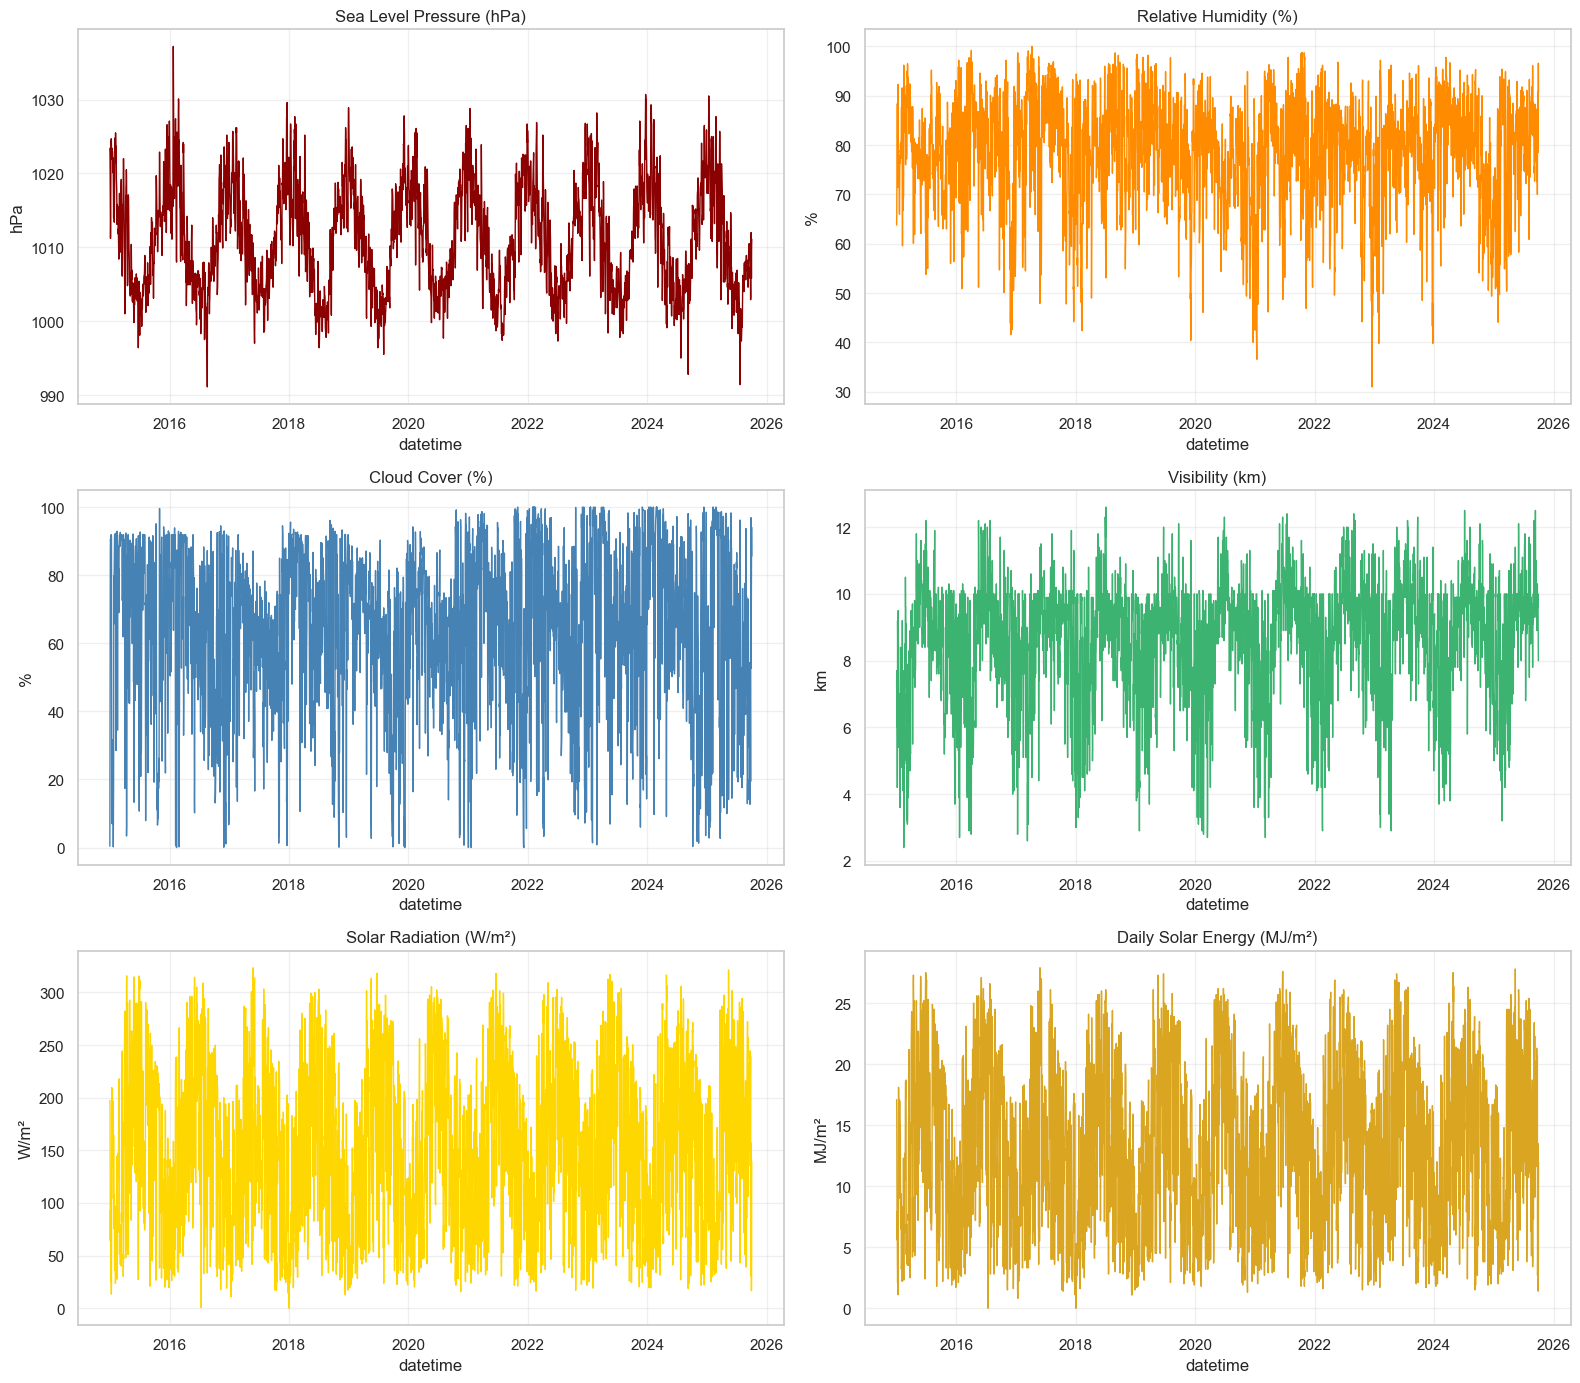

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 14))

# 1️⃣ Atmospheric pressure
plt.subplot(3, 2, 1)
sns.lineplot(x='datetime', y='sealevelpressure', data=df_daily, color='darkred', linewidth=1)
plt.title("Sea Level Pressure (hPa)")
plt.ylabel("hPa")
plt.grid(alpha=0.3)

# 2️⃣ Humidity
plt.subplot(3, 2, 2)
sns.lineplot(x='datetime', y='humidity', data=df_daily, color='darkorange', linewidth=1)
plt.title("Relative Humidity (%)")
plt.ylabel("%")
plt.grid(alpha=0.3)

# 3️⃣ Cloud cover
plt.subplot(3, 2, 3)
sns.lineplot(x='datetime', y='cloudcover', data=df_daily, color='steelblue', linewidth=1)
plt.title("Cloud Cover (%)")
plt.ylabel("%")
plt.grid(alpha=0.3)

# 4️⃣ Visibility
plt.subplot(3, 2, 4)
sns.lineplot(x='datetime', y='visibility', data=df_daily, color='mediumseagreen', linewidth=1)
plt.title("Visibility (km)")
plt.ylabel("km")
plt.grid(alpha=0.3)

# 5️⃣ Solar radiation
plt.subplot(3, 2, 5)
sns.lineplot(x='datetime', y='solarradiation', data=df_daily, color='gold', linewidth=1)
plt.title("Solar Radiation (W/m²)")
plt.ylabel("W/m²")
plt.grid(alpha=0.3)

# 6️⃣ Solar energy
plt.subplot(3, 2, 6)
sns.lineplot(x='datetime', y='solarenergy', data=df_daily, color='goldenrod', linewidth=1)
plt.title("Daily Solar Energy (MJ/m²)")
plt.ylabel("MJ/m²")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


- **Sea level pressure** stays relatively stable over the decade but oscillates gently with clear annual cycles.  
  Slight drops often coincide with stormy or hot periods — a typical pattern in tropical low-pressure systems.

- **Humidity** remains consistently high (mostly 70–90%) with stronger fluctuations in the rainy months.  
  The sharp rises during summer monsoon align with periods of frequent precipitation.

- **Cloud cover** and **solar variables** show opposite behaviors: when cloud cover peaks, solar radiation and energy fall sharply.  
  Their seasonal swing is clear — cloudy and low-radiation periods occur in summer, while clear, bright days dominate winter and spring.

- **Visibility** varies mildly but tends to decrease during humid and rainy months.  
  This is likely due to haze, fog, or rainfall reducing air clarity.

- **Solar radiation** and **solar energy** move almost in parallel, showing strong seasonality tied to daylight length and cloud presence.  
  Both peak around mid-year and drop to their lowest levels in winter.

Overall, these variables together confirm the **strong seasonal rhythm** of Hanoi’s tropical monsoon climate — high humidity, thick clouds, and lower sunlight during summer; clearer skies and more stable pressure during the cooler months.

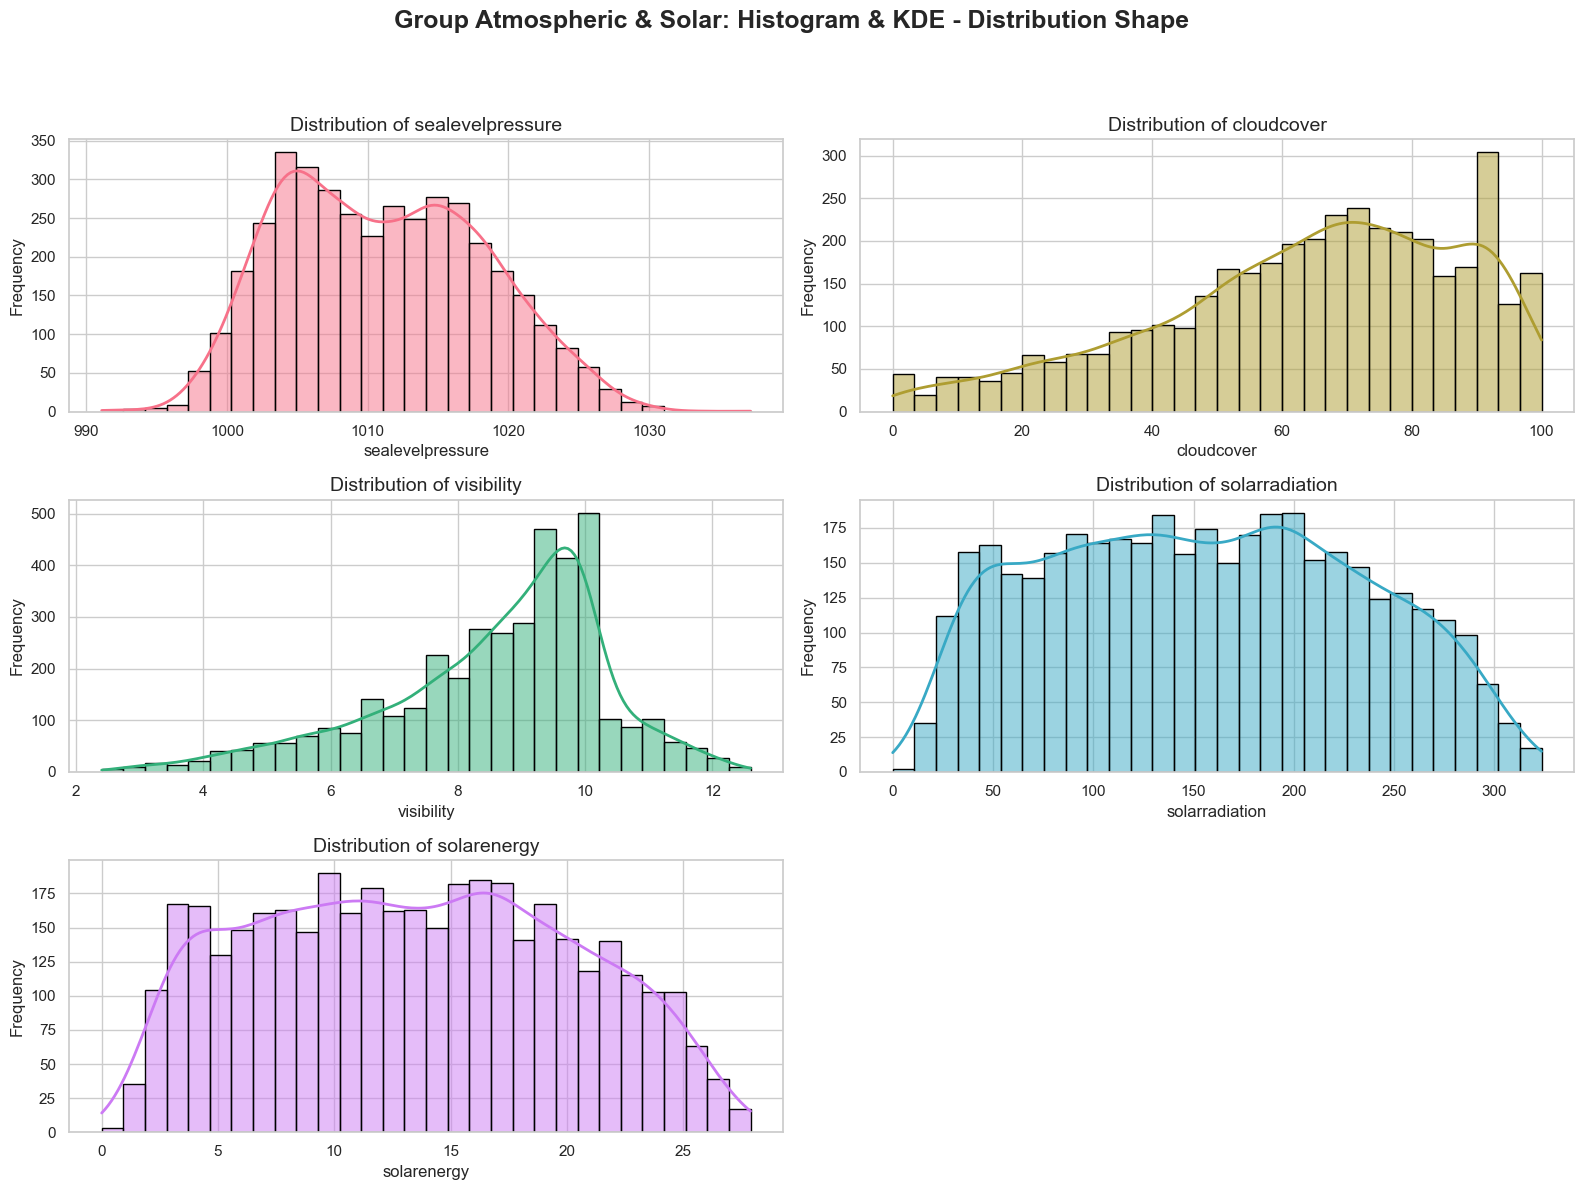

In [117]:
group_name = 'Atmospheric & Solar'
features = ['sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy']
n_features = len(features)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

colors = sns.color_palette("husl", n_colors=n_features)

plt.rcParams['figure.figsize'] = (16, 4 * n_rows)

fig_hist, axes_hist = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
fig_hist.suptitle(f'Group {group_name}: Histogram & KDE - Distribution Shape', 
                  fontsize=18, fontweight='bold', y=1.02)
axes_hist = axes_hist.flatten() 

for i, col in enumerate(features):
    if col in data.columns:
        # Sử dụng colors[i] để gán màu riêng biệt và đường KDE màu đen
        sns.histplot(data=data, x=col, kde=True, ax=axes_hist[i], 
                     color=colors[i], 
                     edgecolor='black', 
                     bins=30, 
                     line_kws={'lw': 2, 'color': 'black'})
        axes_hist[i].set_title(f'Distribution of {col}', fontsize=14)
        axes_hist[i].set_ylabel('Frequency', fontsize=12)

for j in range(i + 1, n_rows * n_cols):
    if j < len(axes_hist):
        fig_hist.delaxes(axes_hist[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

The $sealevelpressure$ distribution is near-symmetric and resembles a normal curve, centered around 1010 to 1015 units. Conversely, $cloudcover$ is clearly negatively (left) skewed, with the highest frequency concentrated at high values ($80\%$ to $100\%$), meaning skies are predominantly cloudy.

The $visibility$ distribution is heavily negatively skewed and features a distinct spike at the maximum measured value of $\mathbf{10}$ units. This suggests the data is limited by an upper bound, and visibility is at or near its maximum most of the time.

Finally, both $solarradiation$ and $solarenergy$ distributions are broad and relatively symmetric (platykurtic). They lack a sharp peak, indicating that energy values are widely and somewhat uniformly spread across a large range (roughly 50 to 250 units), meaning medium and high energy days occur with similar frequency.

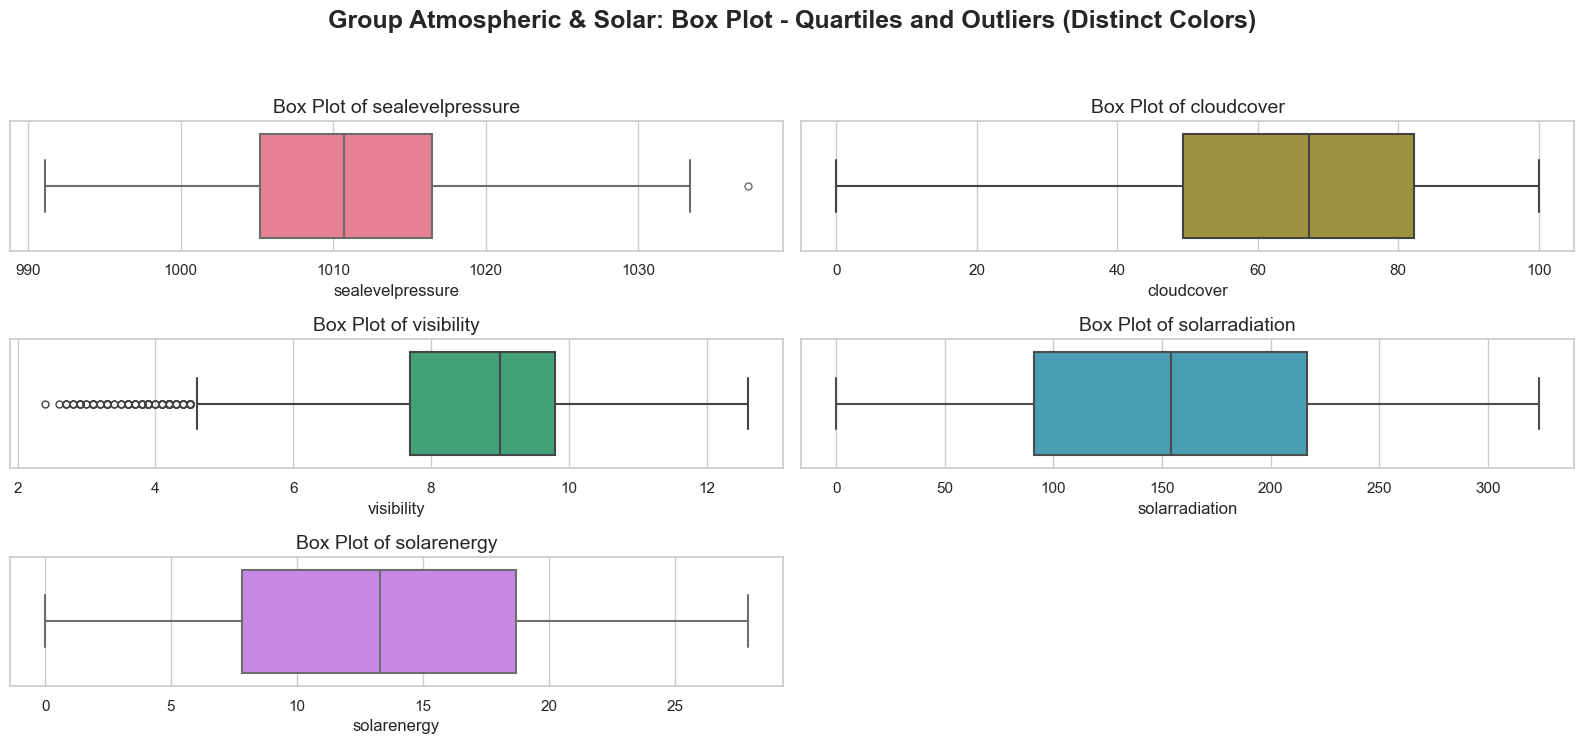

In [119]:
group_name = 'Atmospheric & Solar'
features = ['sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy']
n_features = len(features)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

colors = sns.color_palette("husl", n_colors=n_features)

plt.rcParams['figure.figsize'] = (16, 2.5 * n_rows)

fig_box, axes_box = plt.subplots(n_rows, n_cols, figsize=(16, 2.5 * n_rows))
fig_box.suptitle(f'Group {group_name}: Box Plot - Quartiles and Outliers (Distinct Colors)', 
                 fontsize=18, fontweight='bold', y=1.02)
axes_box = axes_box.flatten() 

for i, col in enumerate(features):
    if col in data.columns:
        # Use distinct color for each box plot
        sns.boxplot(data=data, x=col, ax=axes_box[i], 
                    color=colors[i], 
                    orient='h', fliersize=5, linewidth=1.5)
        axes_box[i].set_title(f'Box Plot of {col}', fontsize=14)
        axes_box[i].set_ylabel('')

# Hide any extra subplots in the last row
for j in range(i + 1, n_rows * n_cols):
    if j < len(axes_box):
        fig_box.delaxes(axes_box[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

plt.show()

The $sealevelpressure$ variable has a median centered near the middle of the box, indicating a highly symmetric distribution. The IQR box is relatively tight (spanning approximately 1008 to 1018), showing a concentrated distribution of pressure values. Only a single outlier is present on the high-pressure side.

In contrast, $cloudcover$ has its IQR box situated entirely on the high-value side (roughly $60\%$ to $85\%$), with the median clearly shifted to the right, confirming the strong negative (left) skew observed earlier. The wide IQR suggests substantial variability in cloud coverage, even at high levels.

Both $solarradiation$ and $solarenergy$ feature wide IQR boxes with the medians positioned close to the center, indicating relative symmetry and a large dispersion of daily solar energy values. Notably, neither variable displays clear outliers, suggesting that extremely anomalous radiation or energy values are not present in the dataset.

The $visibility$ variable displays a unique pattern: its IQR box (the middle $50\%$ of data) is located at the highest values (roughly $8$ to $10$ units), with the median strongly biased toward the maximum value. This confirms the strong negative skew. The most prominent feature is the presence of a long chain of outliers spanning from approximately 2 to 6 units. These outliers represent the rare days when visibility is significantly reduced, likely due to fog, haze, or heavy rain.

**B. CATEGORICAL VARIABLES**

C:\Users\tuann\AppData\Local\Temp\ipykernel_1680\1927304469.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


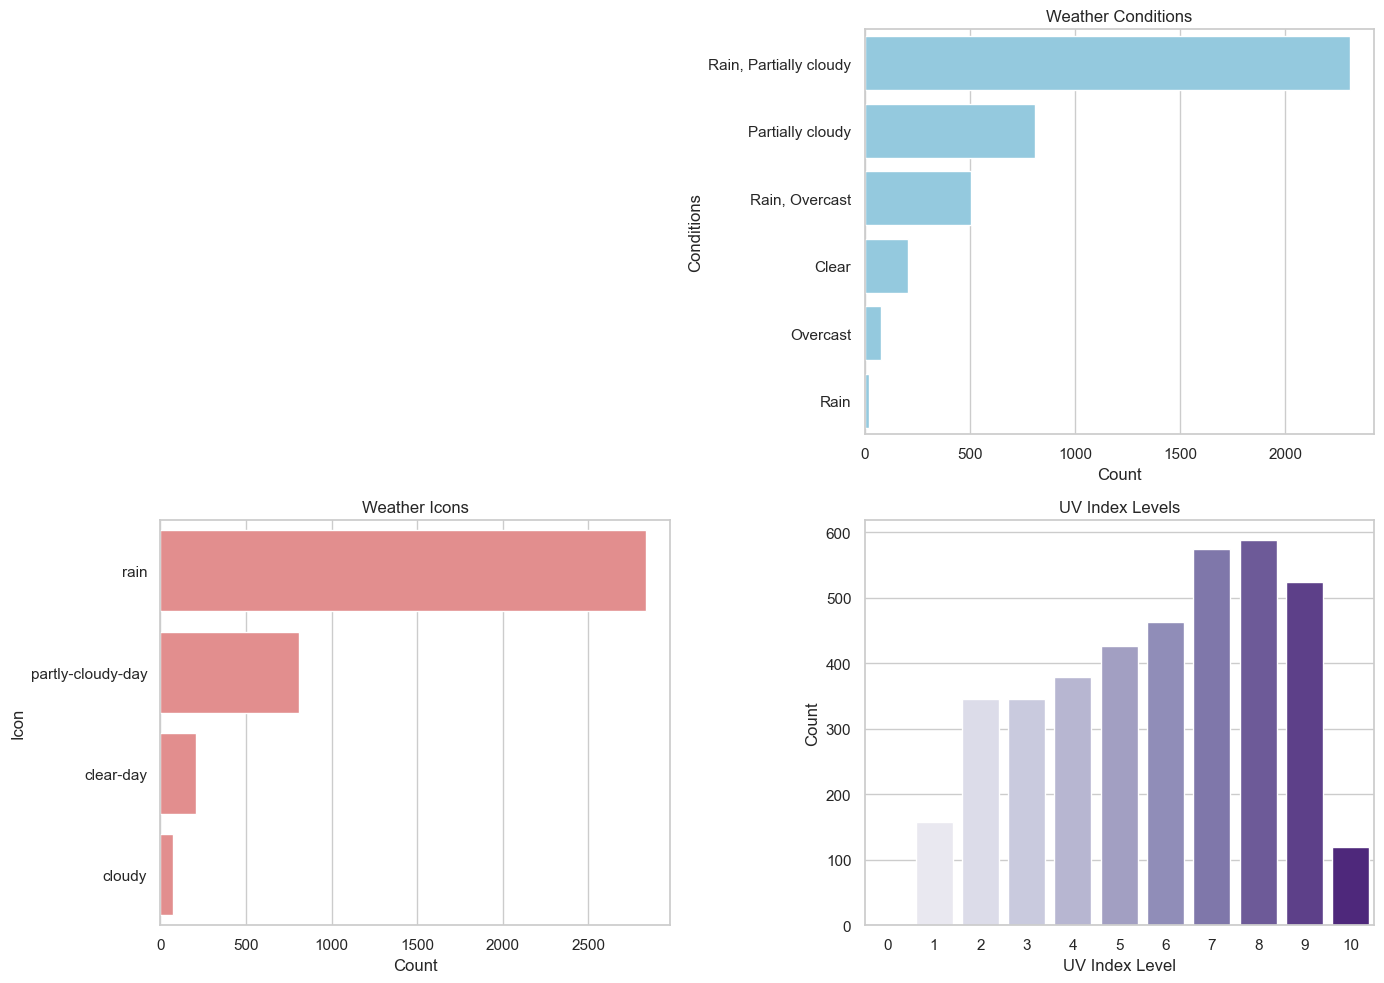

In [91]:
plt.figure(figsize=(14, 10))

# --- 1️⃣ Weather Conditions (nominal – 1 màu) ---
plt.subplot(2, 2, 2)
order_cond = df_daily['conditions'].value_counts().index
sns.countplot(
    y='conditions',
    data=df_daily,
    order=order_cond,
    color='skyblue'   # 1 màu duy nhất
)
plt.title("Weather Conditions")
plt.xlabel("Count")
plt.ylabel("Conditions")

# --- 2️⃣ Weather Icons (nominal – 1 màu) ---
plt.subplot(2, 2, 3)
order_icon = df_daily['icon'].value_counts().index
sns.countplot(
    y='icon',
    data=df_daily,
    order=order_icon,
    color='lightcoral'   # 1 màu duy nhất, khác màu trên 1 chút để dễ phân biệt biểu đồ
)
plt.title("Weather Icons")
plt.xlabel("Count")
plt.ylabel("Icon")

# --- 3️⃣ UV Index Levels (ordinal – màu gradient nhạt → đậm) ---
plt.subplot(2, 2, 4)
order_uv = sorted(df_daily['uvindex'].dropna().unique())  # 0 → 10
colors_uv = sns.color_palette("Purples", len(order_uv))
sns.countplot(
    x='uvindex',
    data=df_daily,
    order=order_uv,
    palette=colors_uv
)
plt.title("UV Index Levels")
plt.xlabel("UV Index Level")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

- **Weather Conditions:**  
  The most frequent states are *“Partially cloudy”*, *“Overcast”*, and *“Clear”*.  
  This pattern reflects the alternating sunny and cloudy days typical of Hanoi, with few extreme or rare conditions.

- **Weather Icons:**  
  The `icon` variable aligns closely with `conditions`, showing most days as *“partly-cloudy-day”* or *“cloudy”*, while *“rain”* occurs less often but is concentrated during monsoon months.

- **UV Index:**  
  Values range mostly between 4 and 8, with a clear dominance of mid-to-high levels (6–8).  
  This suggests that Hanoi experiences strong sunlight throughout the year, especially during the dry months when cloud cover is lower.

Overall, the categorical variables give a quick qualitative overview of Hanoi’s weather: mostly cloudy-to-clear days, high UV exposure, and rain as the only precipitation type — all consistent with the city’s humid tropical monsoon pattern.


**IV. Correlation Analysis**

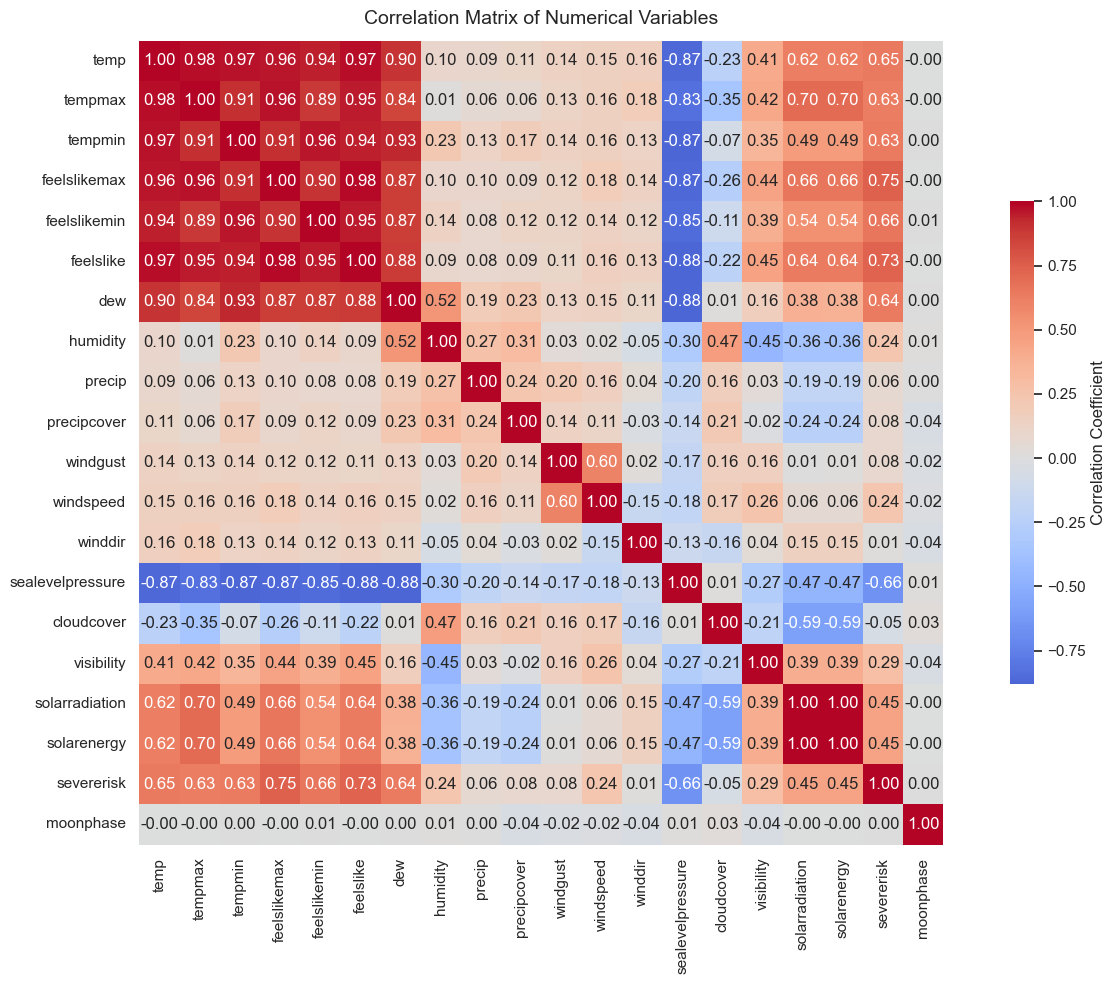

In [92]:
# Correlation analysis
num_df = df_daily.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_df.corr()
if 'temp' in corr_matrix.columns:
    cols = ['temp'] + [col for col in corr_matrix.columns if col != 'temp']
    corr_matrix = corr_matrix.loc[cols, cols]

# Vẽ heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={'shrink': 0.6, 'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix of Numerical Variables", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

- When looking at the correlation matrix, the first thing that stands out is how strongly the temperature-related variables move together.  
`temp`, `tempmax`, `tempmin`, and all the “feels like” metrics are almost perfectly correlated — above 0.95 in most cases. That’s very reasonable: the daily average temperature will always rise and fall in sync with its maximum and minimum values, and the “feels like” readings are derived directly from those temperature and humidity measures.  
In a time-series context, this isn’t a problem. It simply means that these variables describe the same thermal behavior, and we should handle them carefully in feature engineering rather than trying to remove them.
- Another clear relationship is the **negative correlation between air pressure and temperature** (around −0.87). This fits well with the reality of Hanoi’s climate — on hot days, air pressure usually drops as warm, humid air expands, while cooler, stable days are often associated with higher pressure. So, `sealevelpressure` seems like a genuinely meaningful variable that could help the model capture seasonal shifts or pre-storm drops in pressure.
- The rainfall features — `precip`, `precipprob`, and `precipcover` — are also strongly correlated with one another (0.7–1.0), which makes perfect sense since they all describe how much and how likely it is to rain.  
Their correlation with temperature is quite low, though, around 0.1–0.2. This mirrors real weather patterns in Hanoi: heavy rain doesn’t always mean lower temperatures, especially in summer when tropical storms can bring both rain and heat at the same time. These features are worth keeping because they likely help explain short-term fluctuations rather than long-term temperature changes.
- The solar and cloud-related variables behave exactly as expected. `solarradiation` and `solarenergy` are almost identical (corr ≈ 0.99), both showing strong positive correlation with temperature and strong negative correlation with `cloudcover`. It’s intuitive — when the sky clears up, sunlight increases, temperatures rise, and cloud cover drops. These relationships confirm that the dataset reflects natural day-to-day patterns quite faithfully.
- Wind speed and gusts show moderate correlation (around 0.8), meaning stronger general winds usually come with stronger gusts — no surprise there. But their relationship with temperature is minimal, which again makes sense: in Hanoi, wind tends to follow seasonal monsoon patterns rather than daily temperature swings.  
`visibility` has a small negative correlation with humidity and cloud cover, which likely represents foggy or hazy days when the air is thick with moisture — exactly what we’d expect during humid months.
- A few columns stand out as less useful. `moonphase` shows no relationship with anything, which is expected — it doesn’t influence temperature in any practical sense. `severerisk` has a moderate positive correlation with temperature and solar variables, which probably just reflects that hotter, sunnier periods coincide with more “severe weather” risk according to the data provider’s scoring method.
- Overall, the correlations make sense and match how Hanoi’s weather behaves in reality. The high correlations between temperature variables aren’t an issue — they simply confirm internal consistency. The mix of positive and negative relationships among radiation, humidity, cloud cover, and pressure paint a very realistic picture of the local climate.
- That said, when multiple features are highly correlated **with each other** (not necessarily with the target), it’s worth avoiding redundancy in modeling.  
For example, since `solarradiation` and `solarenergy` tell almost the same story, or since `precip`, `precipprob`, and `precipcover` are strongly related, it would make sense to **keep only one representative variable** from each group, or to **combine them into a new aggregated feature** (e.g., an “average precipitation index” or “solar exposure score”).  This helps simplify the model, reduce noise, and make feature interpretation clearer — while still preserving the meaningful climatic patterns revealed by the data.

## DATA HANOI HOURLY

In [93]:
# Load the dataset
df_hourly = pd.read_excel(r"../data/raw/hanoi_hourly.xlsx")

print("Shape of data", df_hourly.shape)
df_hourly.head()

Shape of data (94248, 24)


,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Hanoi,2015-01-01T00:00:00,15.0,15.0,13.0,87.84,0.0,0,NaN,0.0,0.0,11.9,3.6,270.0,1023.0,0.0,3.5,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,VVNB"
1,Hanoi,2015-01-01T01:00:00,15.8,15.8,13.0,83.33,0.0,0,NaN,0.0,0.0,11.2,6.4,314.0,1022.6,0.0,8.5,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,48825099999,48831099999,VVNB"
2,Hanoi,2015-01-01T02:00:00,13.5,13.5,12.0,90.65,0.0,0,NaN,0.0,0.0,11.2,3.6,90.0,1022.0,0.0,3.0,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,VVNB"
3,Hanoi,2015-01-01T03:00:00,13.0,13.0,12.0,93.65,0.0,0,NaN,0.0,0.0,11.2,1.8,329.2,1022.0,0.0,2.0,0.0,0.0,0.0,NaN,Clear,clear-night,VVNB
4,Hanoi,2015-01-01T04:00:00,14.7,14.7,12.5,86.57,0.0,0,NaN,0.0,0.0,10.8,9.2,352.0,1022.4,0.0,8.2,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,48825099999,VVNB"


In [94]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94248 entries, 0 to 94247
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              94248 non-null  object 
 1   datetime          94248 non-null  object 
 2   temp              94248 non-null  float64
 3   feelslike         94248 non-null  float64
 4   dew               94248 non-null  float64
 5   humidity          94248 non-null  float64
 6   precip            94209 non-null  float64
 7   precipprob        94248 non-null  int64  
 8   preciptype        12055 non-null  object 
 9   snow              94206 non-null  float64
 10  snowdepth         94206 non-null  float64
 11  windgust          94199 non-null  float64
 12  windspeed         94247 non-null  float64
 13  winddir           94246 non-null  float64
 14  sealevelpressure  94248 non-null  float64
 15  cloudcover        94248 non-null  float64
 16  visibility        94070 non-null  float6

In [95]:
# Diagnosing and correcting data types
# 1.Datetime column
datetime_cols = ['datetime']
for col in datetime_cols:
    df_hourly[col] = pd.to_datetime(df_hourly[col], errors='coerce')
    
# 2 precipprob → float64
df_hourly['precipprob'] = df_hourly['precipprob'].astype('float64')

# 3. Change to Categorical features
categorical_cols = ['conditions', 'icon', 'uvindex']
df_hourly[categorical_cols] = df_hourly[categorical_cols].astype('category')

# 4. Drop 4 columns do not have the values for modeling
df_hourly.drop(columns=['name', 'preciptype','snow', 'snowdepth'], inplace=True)

print(df_hourly.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94248 entries, 0 to 94247
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          94248 non-null  datetime64[ns]
 1   temp              94248 non-null  float64       
 2   feelslike         94248 non-null  float64       
 3   dew               94248 non-null  float64       
 4   humidity          94248 non-null  float64       
 5   precip            94209 non-null  float64       
 6   precipprob        94248 non-null  float64       
 7   windgust          94199 non-null  float64       
 8   windspeed         94247 non-null  float64       
 9   winddir           94246 non-null  float64       
 10  sealevelpressure  94248 non-null  float64       
 11  cloudcover        94248 non-null  float64       
 12  visibility        94070 non-null  float64       
 13  solarradiation    94212 non-null  float64       
 14  solarenergy       9421

In [96]:
df_hourly.describe()

,datetime,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,severerisk
count,94248,94248.000000,94248.000000,94248.000000,94248.000000,94209.000000,94248.000000,94199.000000,94247.000000,94246.000000,94248.000000,94248.000000,94070.000000,94212.000000,94212.000000,32645.000000
mean,2020-05-17 11:30:00,24.896258,27.393700,20.485905,78.270513,0.217643,8.245268,17.380778,9.318116,142.613537,1011.082052,64.712259,8.599728,155.174609,0.558068,17.062031
min,2015-01-01 00:00:00,5.900000,2.100000,-8.000000,17.590000,0.000000,0.000000,1.100000,0.000000,0.000000,985.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2017-09-08 17:45:00,21.000000,21.000000,17.000000,67.360000,0.000000,0.000000,11.500000,5.600000,65.000000,1005.000000,36.100000,7.000000,0.000000,0.000000,10.000000
50%,2020-05-17 11:30:00,25.900000,25.900000,22.400000,81.880000,0.000000,0.000000,16.600000,8.500000,115.000000,1010.900000,81.900000,10.000000,5.800000,0.000000,10.000000
75%,2023-01-24 05:15:00,29.000000,34.200000,25.000000,91.340000,0.000000,0.000000,22.000000,12.100000,185.000000,1016.800000,89.900000,10.000000,248.125000,0.900000,15.000000
max,2025-10-01 23:00:00,41.900000,52.500000,31.000000,100.000000,186.240000,100.000000,118.800000,53.600000,360.000000,1041.000000,100.000000,24.100000,1011.900000,3.600000,100.000000
std,NaN,5.613481,8.500585,5.931406,15.748502,2.647468,27.505461,7.716193,4.824510,104.672241,7.315970,34.604449,2.848757,235.708445,0.849264,15.945075


In [97]:
# Save processed data
df_hourly.to_excel('../data/processed/data_hourly_after_basic_understand.xlsx', index=False)